In [1]:
!pip install nltk
!pip install plotly
!pip install gensim
!pip install spacy
!pip install pyLDAvis
!pip install langdetect
!pip install matplotlib
!pip install kaleido
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.6/12.8 MB 36.2 MB/s eta 0:00:01
     ---- ----------------------------------- 1.4/12.8 MB 17.2 MB/s eta 0:00:01
     ------ --------------------------------- 2.2/12.8 MB 17.4 MB/s eta 0:00:01
     ---------- ----------------------------- 3.2/12.8 MB 20.5 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.8 MB 19.3 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/12.8 MB 21.1 MB/s eta 0:00:01
     -------------------- ------------------- 6.4/12.8 MB 21.7 MB/s eta 0:00:01
     ----------------------- ---------------- 7.5/12.8 MB 21.8 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 23.1 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 22.1 MB/s eta 0:00:01
     --------------------------------- ----- 10.9/12.8 MB 24.2 MB/s eta 0:00:01
     ------------------------------------ -- 12.


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json
import glob
import pandas as pd
import numpy as np
import tqdm #progress bar
import re  #regular expressions

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# download VADER lexicon
nltk.download(["vader_lexicon"])

# import and initialize our sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

# import a language detection function
from langdetect import detect

stop_words = stopwords.words('english')
stop_words.extend(['br'])

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import TfidfModel
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy

#visualization
import pyLDAvis
import pyLDAvis.gensim

import plotly
import plotly.graph_objs as go
import plotly.offline as py

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.io as pio
pio.renderers.default = "browser"

# Import datasets

In [4]:
def ensure_english(dataf, column):
    for index, row in dataf.iterrows():
        try:
          if detect(row[column]) != 'en':
            print(detect(row[column]) + " comment detected.")
            print("Removed comment:", row[column])
            dataf = dataf.drop(index)
        except:
            print("This comment throws an error:", row[column])
            dataf = dataf.drop(index)

    return dataf

def clean_review(review):
    # Regular expression pattern to match the unwanted text
    pattern = r"\n.*?found this helpful\..*?Permalink"

    # Replace the matched pattern with an empty string
    clean_text = re.sub(pattern, "", review, flags=re.DOTALL)

    return clean_text

In [5]:
titles = ["Alice in Borderland", "Bleach", "Cowboy Bebop", "Death Note", "Dragonball꞉ Evolution", "One Piece"]

In [6]:
rotten_reviews = glob.glob("rotten_tomatoes_reviews/*.xlsx")
rotten_series = []
rotten_dataframes =[]
for path in rotten_reviews:
    df = pd.read_excel(path)
    df = df.drop(['Unnamed: 0'], axis=1)
    df = ensure_english(df, "Review_body")
    rotten_series.append(df["Review_body"])
    rotten_dataframes.append(df)

print(rotten_reviews)  # make sure the titles are in order
rotten_dataframes[0]

de comment detected.
Removed comment: Alice in Borderland ist eine ScienceFiction, Mystery und ThrillerFernsehserie, basierend auf dem gleichnamigen Manga von Haro As Der von Videospielen besessene Arisu befindet sich pltzlich in einer seltsamen, leeren Version von Tokio wieder Eine Geschichte ber berlebensspiele eine rasante schnelle Geschichte, die die ganze Zeit ber fesselt Schauspieler und Atmosphre sind erstklassig Kurz gesagt, die erste Staffel ist sehr gut, ein unterschtztes Meisterwerk mal sehen wie die zweite Staffel ist
pt comment detected.
Removed comment: Mais frentico que Round 6, Alice in Borderland me chamou muita ateno por sua narrativa de jogos s que matadores e que poucos sobrevivem nessa tima 1 temporada.
pt comment detected.
Removed comment: Este  um dorama no estilo distopia somada com uma tenso psapocalptica, no qual, sua premissa  um jogo com pessoas reais e que a derrota significa a morte, muito semelhante a Round 6. No entanto, dessa vez estamos em uma Tokyo pa

User_name  Review Rating   Review date  \
0    Abhishek G            5.0   Oct 5, 2023   
1      Justin T            3.0  Sep 21, 2023   
2        Sourav            5.0   Sep 6, 2023   
4     Vincent F            4.0   Sep 3, 2023   
5       David M            5.0  Aug 17, 2023   
..          ...            ...           ...   
238         NaN            3.5  Dec 12, 2020   
239         NaN            4.0  Dec 12, 2020   
240         NaN            5.0  Dec 11, 2020   
242         NaN            5.0  Dec 11, 2020   
243         NaN            5.0  Dec 11, 2020   

                                           Review_body  
0    I found the show very intriguing. Have not alw...  
1    The start of the first episode is one of the m...  
2    The series being a manga adoption stand on its...  
4    Dark and twisted, the puzzles are interesting ...  
5                      an absolute must in this gendre  
..                                                 ...  
238  the premise is hilarious and dark. the mystery...  
239  The series is extremely entertaining, it is th...  
240  It was one of those shows that left me empty a...  
242  The drama and suspense is top notch even thoug...  
243  For someone that didnt know about the Manga I ...  

[229 rows x 4 columns]

In [7]:
imdb_reviews = glob.glob("imdb_reviews/*.csv")
imdb_series = []
imdb_dataframes = []
for path in imdb_reviews:
    df = pd.read_csv(path)
    df = ensure_english(df, "Review_body")
    imdb_series.append(df["Review_body"])
    imdb_dataframes.append(df)

print(imdb_reviews)  # make sure the titles are in order
imdb_dataframes[0]

en comment detected.
Removed comment: Nessa analise me baseei em 5 importantes pontos: Enredo, desenvolvimento, personagens, estética e entretenimento.Enredo: 2/2.Desenvolvimento: 1/2.Estética: 2/2.Personagens: 1/2.Entretenimento: 2/2.
                
                    0 out of 4 found this helpful.
                        
                            Was this review helpful?  Sign in to vote.
                        
                        
                    Permalink
hr comment detected.
Removed comment: Just no, man F kame hame ha to revive goku, i mean nope
['imdb_reviews\\imdb_reviews_Alice_in_Borderland.csv', 'imdb_reviews\\imdb_reviews_Bleach.csv', 'imdb_reviews\\imdb_reviews_Cowboy_Bebop.csv', 'imdb_reviews\\imdb_reviews_Death_Note.csv', 'imdb_reviews\\imdb_reviews_Dragonball_Evolution.csv', 'imdb_reviews\\imdb_reviews_One_Piece.csv']


User_name                                       Review title  \
0             sisubalan   Great Season 2, Best Graphic and Faithful Ending   
1          secret_arash                                Surprisingly Great!   
2            tachiiderp  Probably the best anime/manga live adaptation ...   
3             gazzalodi                              Japanese Gut Punching   
4              thekhpro  I'm shocked and paralyzed by this tv show! SUP...   
..                  ...                                                ...   
710  stefan-milovanovic                                        Interesting   
711       kristinhummel             I Loved this show! More great writing!   
712              xxugxx                                             Stupid   
713           nourmasri  An amazing series about survival and philosoph...   
714       damienj-01899                 I was hooked after the 2nd episode   

    Review Rating        Review date  \
0            8/10   26 December 2022   
1            9/10   29 December 2022   
2            9/10   28 December 2022   
3            8/10    12 January 2021   
4           10/10    14 January 2023   
..            ...                ...   
710          7/10     4 October 2021   
711          8/10  29 September 2023   
712          4/10       5 March 2023   
713         10/10    13 January 2022   
714          9/10     2 January 2021   

                                           Review_body  
0    A manga or comic book adapted live action seri...  
1    This show is definitely among my 20 favorite s...  
2    To be fair, it's not that big of a feat, espec...  
3    If you get tired of OP characters in non-exist...  
4    I wasn't waiting for this at all! Japan has al...  
..                                                 ...  
710  It could have been done much more interestingl...  
711  I know graphic novels get a lot of attention l...  
712  Wow where to even begin. Episodes 1-3 were pre...  
713  This is probably one of the best series I have...  
714  This movie plays with your emotions and does i...  

[714 rows x 5 columns]

In [10]:
for dataframe in imdb_dataframes:
    rating = dataframe["Review_body"]
    new_rating = rating.apply(clean_review)
    dataframe["Review_body"] = new_rating

imdb_dataframes[0]

User_name                                       Review title  \
0             sisubalan   Great Season 2, Best Graphic and Faithful Ending   
1          secret_arash                                Surprisingly Great!   
2            tachiiderp  Probably the best anime/manga live adaptation ...   
3             gazzalodi                              Japanese Gut Punching   
4              thekhpro  I'm shocked and paralyzed by this tv show! SUP...   
..                  ...                                                ...   
710  stefan-milovanovic                                        Interesting   
711       kristinhummel             I Loved this show! More great writing!   
712              xxugxx                                             Stupid   
713           nourmasri  An amazing series about survival and philosoph...   
714       damienj-01899                 I was hooked after the 2nd episode   

    Review Rating        Review date  \
0            8/10   26 December 2022   
1            9/10   29 December 2022   
2            9/10   28 December 2022   
3            8/10    12 January 2021   
4           10/10    14 January 2023   
..            ...                ...   
710          7/10     4 October 2021   
711          8/10  29 September 2023   
712          4/10       5 March 2023   
713         10/10    13 January 2022   
714          9/10     2 January 2021   

                                           Review_body  
0    A manga or comic book adapted live action seri...  
1    This show is definitely among my 20 favorite s...  
2    To be fair, it's not that big of a feat, espec...  
3    If you get tired of OP characters in non-exist...  
4    I wasn't waiting for this at all! Japan has al...  
..                                                 ...  
710  It could have been done much more interestingl...  
711  I know graphic novels get a lot of attention l...  
712  Wow where to even begin. Episodes 1-3 were pre...  
713  This is probably one of the best series I have...  
714  This movie plays with your emotions and does i...  

[714 rows x 5 columns]

In [9]:
youtube_comments = glob.glob("youtube_comments/*.xlsx")
youtube_series = []
youtube_dataframes = []
for path in youtube_comments:
    df = pd.read_excel(path)
    df = df.drop(['Unnamed: 0'], axis=1)
    youtube_series.append(df["text"])
    youtube_dataframes.append(df)

print(youtube_comments)  # make sure the titles are in order
youtube_dataframes[0]

['youtube_comments\\alice_borderland.xlsx', 'youtube_comments\\alice_borderland2.xlsx', 'youtube_comments\\cowboy_bebop.xlsx', 'youtube_comments\\death_note.xlsx', 'youtube_comments\\dragonball_evolution.xlsx', 'youtube_comments\\monster_hunter.xlsx', 'youtube_comments\\one_piece.xlsx']


text
0     Going to watch today bcz of this all comment h...
1     I didn't like the Pigs and Wolf game. They swi...
2                                     So boaring series
3                         Finally season 3 is confirmed
4                                   WE NEED A SEASON 3!
...                                                 ...
3659  Usagi means rabbit in Japanese and Arisu is ju...
3660  This is the type of show where you need to tur...
3661  After seeing S2, we now know that the 1st game...
3662  if the show was realistic <br>they'd all fumbl...
3663  <b>Completely unrealistic❗️❗️❗️</b><br><br>The...

[3664 rows x 1 columns]

In [11]:
# Create a dataframe for each medium which has an equal amount of entries in each dataframe
def combine_dataframes(dataframe_list):
    df_list = []
    length = len(min(dataframe_list, key=len))
    for item in dataframe_list:
        sample = item.sample(n=length)
        df_list.append(sample)

    combined = pd.concat(df_list, ignore_index=True)
    return combined

In [12]:
rotten_combined = combine_dataframes(rotten_series)
imdb_combined = combine_dataframes(imdb_series)
youtube_combined = combine_dataframes(youtube_series)

In [13]:
critic_sites_dataframes = [pd.DataFrame() for title in titles]
critic_sites_series = [pd.Series() for title in titles]
for i in range(len(titles)):
    critic_sites_dataframes[i] = pd.concat([rotten_dataframes[i], imdb_dataframes[i]], ignore_index=True)
    critic_sites_series[i] = pd.concat([rotten_dataframes[i]["Review_body"], imdb_dataframes[i]["Review_body"]], ignore_index=True)

critic_sites_dataframes[0]

User_name Review Rating        Review date  \
0            Abhishek G           5.0        Oct 5, 2023   
1              Justin T           3.0       Sep 21, 2023   
2                Sourav           5.0        Sep 6, 2023   
3             Vincent F           4.0        Sep 3, 2023   
4               David M           5.0       Aug 17, 2023   
..                  ...           ...                ...   
938  stefan-milovanovic          7/10     4 October 2021   
939       kristinhummel          8/10  29 September 2023   
940              xxugxx          4/10       5 March 2023   
941           nourmasri         10/10    13 January 2022   
942       damienj-01899          9/10     2 January 2021   

                                           Review_body  \
0    I found the show very intriguing. Have not alw...   
1    The start of the first episode is one of the m...   
2    The series being a manga adoption stand on its...   
3    Dark and twisted, the puzzles are interesting ...   
4                      an absolute must in this gendre   
..                                                 ...   
938  It could have been done much more interestingl...   
939  I know graphic novels get a lot of attention l...   
940  Wow where to even begin. Episodes 1-3 were pre...   
941  This is probably one of the best series I have...   
942  This movie plays with your emotions and does i...   

                                          Review title  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
938                                        Interesting  
939             I Loved this show! More great writing!  
940                                             Stupid  
941  An amazing series about survival and philosoph...  
942                 I was hooked after the 2nd episode  

[943 rows x 5 columns]

# Text Preprocessing Functions

In [14]:
#Helper functions
def lemmatize(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        if type(text) == 'float':
            continue
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return final

In [15]:
# Main preprocess function
def preprocess(_data, ngram_threshold):
    lemmatized = lemmatize(_data)
    words = gen_words(lemmatized)
    words = remove_stopwords(words)

    # Generate bigrams and Trigrams
    bigram_phrases = gensim.models.Phrases(words, min_count=5, threshold=ngram_threshold)
    trigram_phrases = gensim.models.Phrases(bigram_phrases[words], threshold=ngram_threshold)

    bigram = gensim.models.phrases.Phraser(bigram_phrases)
    trigram = gensim.models.phrases.Phraser(trigram_phrases)

    data_bigrams = [bigram[doc] for doc in words]
    data_bigrams_trigrams = [trigram[bigram[doc]] for doc in data_bigrams]

    return data_bigrams_trigrams

# LDA Modeling Functions

In [17]:
def create_corpus(texts, tf_idf_threshold):
    id2word_dic = corpora.Dictionary(texts)
    corpus_bow = [id2word_dic.doc2bow(text) for text in texts]
    tfidf_model = TfidfModel(corpus_bow, id2word=id2word_dic)

    low_value = tf_idf_threshold
    words = []
    words_missing_in_tfidf = []
    for i in range(0, len(corpus_bow)):
        bow = corpus_bow[i]
        low_value_words = [] # Reinitialize to be safe
        tfidf_ids = [id for id, value in tfidf_model[bow]]
        bow_ids = [id for id, value in bow]
        low_value_words = [id for id, value in tfidf_model[bow] if value < low_value]
        drops = low_value_words+words_missing_in_tfidf
        for item in drops:
            words.append(id2word_dic[item])
        words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf score 0 will be missing

        new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
        corpus_bow[i] = new_bow

    return corpus_bow, id2word_dic

In [ ]:
def lda_model(lda_corpus, dictionary, k, a, b):
    lda_model1 = gensim.models.LdaMulticore(corpus=lda_corpus,
                                            id2word=dictionary,
                                            num_topics=k,
                                            random_state=100,
                                            chunksize=100,
                                            passes=10,
                                            per_word_topics = False,
                                            workers = 6,
                                            alpha=a,
                                            eta=b)

    return lda_model1

In [ ]:
def lda_tuner(lda_corpus, id2word_dic, processed):
    grid = {}
    grid['Validation_Set'] = {}

    # Topics range
    min_topics = 5
    max_topics = 15
    step_size = 1
    topics_range = range(min_topics, max_topics, step_size)

    # Alpha parameter
    alpha = list(np.arange(0.01, 0.8, 0.3))
    alpha.append('symmetric')
    alpha.append('asymmetric')

    # Beta parameter
    beta = list(np.arange(0.01, 0.8, 0.3))
    beta.append('symmetric')

    model_results = {'Topics': [],
                     'Alpha': [],
                     'Beta': [],
                     'Coherence': []
                    }

    # Can take a long time to run
    if 1 == 1:
        pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))

        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterate through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    model_holder = lda_model(lda_corpus=lda_corpus, dictionary=id2word_dic,
                                   k=k, a=a, b=b)
                    coherence_model = CoherenceModel(model=model_holder, texts=processed, dictionary=id2word_dic, coherence='c_v')
                    cv = coherence_model.get_coherence()
                    # Save the model results
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    # print(model_results)

                    pbar.update(1)
        pbar.close()
        return pd.DataFrame(model_results)

In [ ]:
def find_common_rows(datasets, threshold):
    dataframes = [pd.read_csv(dataset) for dataset in datasets]
    dataframes_parameters = [param.loc[:, ['Topics', 'Alpha', 'Beta']] for param in dataframes]    # Get common rows among the datasets

    common_rows = pd.DataFrame()
    for df in dataframes:
        df_parameters = df.loc[:, ['Topics', 'Alpha', 'Beta']]

        filtered_df = df[df.Coherence > max(df['Coherence']) * threshold]
        filtered_indices = filtered_df.reset_index()
        to_keep = filtered_indices['index'].to_list()

        filtered_params = df_parameters.iloc[to_keep]
        common_rows = pd.concat([filtered_params, common_rows], ignore_index=True)

    hyperparameter_frequency = common_rows.groupby(dataframes_parameters[0].columns.tolist(),as_index=False).size()
    hyperparameter_frequency.sort_values(by=['size'], ascending=False, inplace=True)
    return hyperparameter_frequency

### Analyzing Rotten Tomato Reviews

In [18]:
rotten_preprocessed = []
rotten_corpus_id2word = []

for dataframe in rotten_dataframes:
    preprocessed = preprocess(dataframe['Review_body'], 20)
    corpus, id2word = create_corpus(preprocessed, 0.05)

    rotten_preprocessed.append(preprocessed)
    rotten_corpus_id2word.append((corpus, id2word))

In [ ]:
# Calculate the LDA hyperparameters
for i in [0, 1, 2, 3, 4, 5]:
    model_results = lda_tuner(rotten_corpus_id2word[i][0], rotten_corpus_id2word[i][1], rotten_preprocessed[i])
    pd.DataFrame(model_results).to_csv(titles[i]+'_rotten_tuning.csv', index=False)

In [ ]:
# Find the most similar hyperparameters
rotten_tuning_path = glob.glob("LDA Tuning\\rotten_tomatoes\\*.csv")
rotten_hyperparameters = find_common_rows(rotten_tuning_path, 0.90)  # Find hyperparameters which generate a coherence score within 90% of the highest score
rotten_hyperparameters

Topics       Alpha  Beta  size
85      11  asymmetric  0.61     3
75      10  asymmetric  0.61     3
26       6  asymmetric  0.31     3
53       8  asymmetric  0.31     3
54       8  asymmetric  0.61     3
..     ...         ...   ...   ...
37       7        0.61  0.01     1
36       7        0.31  0.61     1
35       7        0.31  0.01     1
34       7        0.01  0.61     1
55       8   symmetric  0.01     1

[111 rows x 4 columns]

In [ ]:
# Generate the LDA models based on calculated hyperparameters
rotten_lda = []
for i in range(len(rotten_corpus_id2word)):
    model = lda_model(rotten_corpus_id2word[i][0], rotten_corpus_id2word[i][1], 10, "asymmetric", 0.61)
    rotten_lda.append(model)

In [ ]:
rotten_viz = []
for i in range(len(rotten_lda)):
    rotten_viz.append(pyLDAvis.gensim.prepare(rotten_lda[i], rotten_corpus_id2word[i][0], rotten_corpus_id2word[i][1], mds="mmds", R = 30))
    pyLDAvis.save_html(rotten_viz[i], "LDA Visualizations\\rotten_tomatoes\\"+titles[i]+"_LDAvis.html")

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warni

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
rotten_viz[0]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.076951  0.088022       1        1  54.627729
1     -0.059407  0.004910       2        1  21.281404
3      0.028859  0.027840       3        1  11.018917
2      0.040495 -0.011436       4        1   5.049838
4      0.003103 -0.032673       5        1   3.621052
7      0.023754 -0.033126       6        1   2.755045
6      0.021378 -0.020721       7        1   1.150010
5      0.018769 -0.022815       8        1   0.496004, topic_info=          Term       Freq      Total Category  logprob  loglift
23   character  54.000000  54.000000  Default  30.0000  30.0000
13       watch  55.000000  55.000000  Default  29.0000  29.0000
92      series  49.000000  49.000000  Default  28.0000  28.0000
60        like  15.000000  15.000000  Default  27.0000  27.0000
6         plot  25.000000  25.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
113       well   0.017061  38.090329   Topic8  -7.1846  -2.4046
226      great   0.016990  28.896872   Topic8  -7.1888  -2.1325
92      series   0.016855  49.089878   Topic8  -7.1968  -2.6704
45        game   0.016792  39.154051   Topic8  -7.2006  -2.4480
37     episode   0.016697  26.315875   Topic8  -7.2062  -2.0564

[433 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
366       1  0.827797  absolutely
14        1  0.589378      acting
14        2  0.252591      acting
14        3  0.084197      acting
516       1  0.774013      action
...     ...       ...         ...
418       1  0.553198       write
418       2  0.184399       write
846       1  0.797115        year
846       2  0.132853        year
846       4  0.132853        year

[411 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5, 8, 7, 6])

In [ ]:
rotten_viz[1]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.081969  0.088339       1        1  57.683734
4      0.019880  0.040598       2        1  11.187030
1      0.046848 -0.027448       3        1   8.002623
2     -0.029797 -0.009353       4        1   7.529278
7      0.027118  0.007909       5        1   6.804652
6      0.005246 -0.024074       6        1   3.494540
3     -0.002138 -0.042182       7        1   3.146421
5      0.014813 -0.033790       8        1   2.151721, topic_info=           Term       Freq      Total Category  logprob  loglift
35        anime  77.000000  77.000000  Default  30.0000  30.0000
28        movie  82.000000  82.000000  Default  29.0000  29.0000
11         well  23.000000  23.000000  Default  28.0000  28.0000
133        time  19.000000  19.000000  Default  27.0000  27.0000
7          good  61.000000  61.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
4         enjoy   0.176552  14.465712   Topic8  -6.2590  -0.5670
332    consider   0.174142   3.888823   Topic8  -6.2728   0.7329
469      bleach   0.174035  11.791765   Topic8  -6.2734  -0.3770
609       world   0.174001   2.966356   Topic8  -6.2736   1.0029
49   respectful   0.173363   2.298537   Topic8  -6.2773   1.2543

[463 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.543484    able
0         4  0.271742    able
17        1  0.717448  acting
17        2  0.204985  acting
98        1  0.802779  action
...     ...       ...     ...
56        1  0.354004    wish
56        3  0.354004    wish
188       1  0.529733    work
188       2  0.176578    work
609       1  0.337114   world

[496 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 3, 8, 7, 4, 6])

In [ ]:
rotten_viz[2]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.151356  0.146996       1        1  68.699560
1     -0.112242  0.045357       2        1  21.721868
2      0.019272  0.007676       3        1   4.166823
6      0.065071 -0.033162       4        1   1.693501
5      0.029056 -0.050714       5        1   1.264625
3      0.049955 -0.048964       6        1   1.233864
4      0.054957 -0.023572       7        1   0.880686
7      0.045286 -0.043617       8        1   0.339073, topic_info=             Term        Freq       Total Category  logprob  loglift
76       original  533.000000  533.000000  Default  30.0000  30.0000
0           anime  746.000000  746.000000  Default  29.0000  29.0000
187        series  291.000000  291.000000  Default  28.0000  28.0000
101    adaptation  307.000000  307.000000  Default  27.0000  27.0000
102           bad  296.000000  296.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1780        shake    0.064380    3.045885   Topic8  -7.6722   1.8300
280     beautiful    0.086146   14.895562   Topic8  -7.3809   0.5339
1349       thread    0.060958    3.333841   Topic8  -7.7268   1.6850
2128   satisfying    0.060121    4.584220   Topic8  -7.7406   1.3527
857   masterpiece    0.069836   28.641532   Topic8  -7.5908  -0.3297

[509 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
465       1  0.350197         able
465       2  0.583661         able
465       5  0.058366         able
1221      1  0.743630  abomination
1221      3  0.123938  abomination
...     ...       ...          ...
2125      1  0.647373      worried
2125      2  0.161843      worried
2125      3  0.161843      worried
1286      1  0.121792     year_ago
1286      2  0.852546     year_ago

[869 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 7, 6, 4, 5, 8])

In [ ]:
rotten_viz[3]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.131036  0.153282       1        1  82.092080
5     -0.128077  0.008842       2        1   8.817901
4      0.049211  0.090653       3        1   3.105469
1      0.065580 -0.034986       4        1   2.017399
3      0.015476 -0.040849       5        1   1.833560
2      0.049910 -0.075297       6        1   1.000813
7      0.050950 -0.037678       7        1   0.613380
6      0.027985 -0.063967       8        1   0.519399, topic_info=                Term        Freq       Total Category  logprob  loglift
116             film  464.000000  464.000000  Default  30.0000  30.0000
15             movie  906.000000  906.000000  Default  29.0000  29.0000
127             make  386.000000  386.000000  Default  28.0000  28.0000
53         character  387.000000  387.000000  Default  27.0000  27.0000
240       adaptation  239.000000  239.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
322          overall    0.362477   46.048454   Topic8  -6.2786   0.4158
455             turn    0.363011   70.311788   Topic8  -6.2772  -0.0060
125             look    0.362923   73.349389   Topic8  -6.2774  -0.0485
28              give    0.372831  107.100475   Topic8  -6.2505  -0.4001
167  source_material    0.377952  141.097045   Topic8  -6.2368  -0.6622

[523 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         1  0.991543  absolutely
4574      1  0.429843   absurdity
4574      3  0.429843   absurdity
3499      1  0.179309  accomplish
3499      2  0.717237  accomplish
...     ...       ...         ...
521       2  0.015161       write
521       5  0.015161       write
150       1  0.972150     writing
70        1  0.797859         yet
70        2  0.184121         yet

[924 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 2, 4, 3, 8, 7])

In [ ]:
rotten_viz[4]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.195325  0.239668       1        1  81.246895
1     -0.093422 -0.002137       2        1  10.218617
2      0.036632 -0.005914       3        1   2.779039
4      0.084687 -0.018202       4        1   1.608253
5      0.021664 -0.059270       5        1   1.603483
6      0.052854 -0.060530       6        1   1.121544
3      0.051381 -0.041070       7        1   0.765270
7      0.041529 -0.052546       8        1   0.656900, topic_info=            Term         Freq        Total Category  logprob  loglift
31          film  1300.000000  1300.000000  Default  30.0000  30.0000
4          movie  3558.000000  3558.000000  Default  29.0000  29.0000
85    dragonball   459.000000   459.000000  Default  28.0000  28.0000
34           get   631.000000   631.000000  Default  27.0000  27.0000
23     character   713.000000   713.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
423        react     0.250847     2.985527   Topic8  -7.8800   2.5487
5208    reallife     0.291379     8.300705   Topic8  -7.7302   1.6759
4059  airbending     0.269980     5.028701   Topic8  -7.8065   2.1008
3692        edit     0.276677    14.266514   Topic8  -7.7820   1.0826
1853    likeable     0.261758     6.360368   Topic8  -7.8374   1.8350

[441 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2216      1  0.313489      accident
2216      2  0.313489      accident
3201      1  0.369267  accidentally
3201      6  0.369267  accidentally
6135      1  0.451189        accion
...     ...       ...           ...
434       5  0.553373        yr_old
2417      1  0.254805        yugioh
2417      5  0.509609        yugioh
6874      1  0.424466          zoom
6874      6  0.424466          zoom

[909 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 6, 7, 4, 8])

In [ ]:
rotten_viz[5]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.165847  0.245928       1        1  83.659573
3     -0.087275 -0.024926       2        1   6.767817
1      0.047737  0.016451       3        1   3.844486
2      0.065882 -0.035639       4        1   1.897376
6      0.021495 -0.053040       5        1   1.211697
7      0.043756 -0.056098       6        1   0.919617
5      0.040102 -0.040134       7        1   0.864492
4      0.034150 -0.052541       8        1   0.834943, topic_info=            Term        Freq       Total Category  logprob  loglift
26        series  715.000000  715.000000  Default  30.0000  30.0000
33    adaptation  933.000000  933.000000  Default  29.0000  29.0000
74     character  828.000000  828.000000  Default  28.0000  28.0000
229        world  246.000000  246.000000  Default  27.0000  27.0000
776   liveaction  199.000000  199.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
4521         bug    0.355686    3.519832   Topic8  -7.5277   2.4934
952        today    0.458923   11.750844   Topic8  -7.2729   1.5428
773      western    0.452465   13.896371   Topic8  -7.2871   1.3609
3545        nose    0.411411   13.522681   Topic8  -7.3822   1.2930
771         type    0.371455    6.080507   Topic8  -7.4844   1.9901

[455 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
5858      1  0.438171  aaaaaamazing
478       1  0.348739       ability
478       2  0.464985       ability
478       4  0.116246       ability
5235      1  0.432857     absolutly
...     ...       ...           ...
3857      1  0.216770          zoro
3857      2  0.216770          zoro
3857      3  0.216770          zoro
3857      5  0.216770          zoro
1832      1  0.444214            zu

[865 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 7, 8, 6, 5])

### Analyzing IMDB Reviews

In [ ]:
imdb_preprocessed = []
imdb_corpus_id2word = []

for dataframe in imdb_dataframes:
    preprocessed = preprocess(dataframe['Review_body'], 20)
    corpus, id2word = create_corpus(preprocessed, 0.05)

    imdb_preprocessed.append(preprocessed)
    imdb_corpus_id2word.append((corpus, id2word))

In [ ]:
# Calculate the LDA hyperparameters
for i in [0, 1, 2, 3, 4, 5]:
    model_results = lda_tuner(imdb_corpus_id2word[i][0], imdb_corpus_id2word[i][1], imdb_preprocessed[i])
    pd.DataFrame(model_results).to_csv(titles[i]+'_imdb_tuning.csv', index=False)

In [ ]:
# Find the most similar hyperparameters
imdb_tuning_path = glob.glob("LDA Tuning\\imdb\\*.csv")
imdb_hyperparameters = find_common_rows(imdb_tuning_path, 0.90)  # Find hyperparameters which generate a coherence score within 95% of the highest score
imdb_hyperparameters

Topics       Alpha       Beta  size
9       10  asymmetric       0.61     4
24      14        0.61       0.61     3
12      11  asymmetric       0.61     3
17      12  asymmetric       0.61     3
26      14  asymmetric       0.61     2
21      14        0.01       0.61     2
7        9  asymmetric       0.61     2
19      13  asymmetric       0.61     2
18      13        0.61       0.61     2
15      12        0.61       0.61     1
25      14  asymmetric       0.31     1
23      14        0.61       0.31     1
22      14        0.31       0.61     1
20      13   symmetric       0.61     1
16      12  asymmetric       0.31     1
0        5        0.01       0.61     1
14      12        0.01       0.61     1
1        5        0.31       0.01     1
11      11  asymmetric       0.31     1
10      11        0.01       0.61     1
8       10        0.61       0.61     1
6        8  asymmetric       0.61     1
5        7  asymmetric       0.61     1
4        6        0.01       0.61     1
3        5   symmetric  symmetric     1
2        5        0.61       0.31     1
13      11   symmetric       0.61     1

In [ ]:
# Generate the LDA models based on calculated hyperparameters
imdb_lda = []
for i in range(len(imdb_corpus_id2word)):
    model = lda_model(imdb_corpus_id2word[i][0], imdb_corpus_id2word[i][1], 10, "asymmetric", 0.61)
    imdb_lda.append(model)

In [ ]:
imdb_viz = []
for i in range(len(imdb_lda)):
    imdb_viz.append(pyLDAvis.gensim.prepare(imdb_lda[i], imdb_corpus_id2word[i][0], imdb_corpus_id2word[i][1], mds="mmds", R = 30))
    pyLDAvis.save_html(imdb_viz[i], "LDA Visualizations\\imdb\\"+titles[i]+"_LDAvis.html")

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warni

In [ ]:
imdb_viz[0]

NameError: name 'imdb_viz' is not defined

In [ ]:
imdb_viz[1]

In [ ]:
imdb_viz[2]

In [ ]:
imdb_viz[3]

In [ ]:
imdb_viz[4]

In [ ]:
imdb_viz[5]

### Analyzing Youtube Comments

In [25]:
youtube_preprocessed = []
youtube_corpus_id2word = []

for dataframe in youtube_series:
    preprocessed = preprocess(dataframe, 20)
    corpus, id2word = create_corpus(preprocessed, 0.21)

    youtube_preprocessed.append(preprocessed)
    youtube_corpus_id2word.append((corpus, id2word))

In [ ]:
# Calculate the LDA hyperparameters
for i in [1]:  #done with 0, 1, 3, 4, 5
    model_results = lda_tuner(youtube_corpus_id2word[i][0], youtube_corpus_id2word[i][1], youtube_preprocessed[i])
    pd.DataFrame(model_results).to_csv(titles[i] + '_youtube_tuning.csv', index=False)

100%|██████████| 200/200 [45:34<00:00, 13.67s/it]


In [ ]:
 # Find the most similar hyperparameters
youtube_tuning_path = glob.glob("LDA Tuning\\youtube\\*.csv")
youtube_hyperparameters = find_common_rows(youtube_tuning_path, 0.90)  # Find hyperparameters which generate a coherence score within 90% of the highest score
youtube_hyperparameters

Topics       Alpha       Beta  size
28      11  asymmetric       0.61     6
21       8  asymmetric       0.61     5
15       6  asymmetric       0.61     5
26      10  asymmetric       0.61     5
36      13  asymmetric       0.61     5
6        5  asymmetric       0.61     4
19       7  asymmetric       0.61     4
35      13  asymmetric       0.31     3
18       7  asymmetric       0.31     3
29      12  asymmetric       0.31     3
5        5  asymmetric       0.31     3
39      14  asymmetric       0.31     3
23       9  asymmetric       0.61     3
22       9  asymmetric       0.31     3
40      14  asymmetric       0.61     3
30      12  asymmetric       0.61     3
1        5        0.01       0.61     2
0        5        0.01       0.01     2
8        5   symmetric       0.01     2
2        5        0.01  symmetric     2
14       6  asymmetric       0.31     2
7        5  asymmetric  symmetric     2
31      12  asymmetric  symmetric     1
3        5        0.31       0.01     1
38      14        0.31       0.61     1
37      14        0.01       0.61     1
4        5        0.61       0.01     1
34      13        0.31       0.61     1
33      13        0.31       0.31     1
32      13        0.31       0.01     1
17       6   symmetric       0.61     1
16       6  asymmetric  symmetric     1
9        5   symmetric       0.31     1
10       5   symmetric       0.61     1
27      11  asymmetric       0.31     1
11       5   symmetric  symmetric     1
25      10  asymmetric       0.31     1
24       9   symmetric       0.61     1
12       6        0.01  symmetric     1
13       6        0.61       0.01     1
20       8  asymmetric       0.31     1
41      14  asymmetric  symmetric     1

In [ ]:
# Generate the LDA models based on calculated hyperparameters
youtube_lda = []
for i in range(len(youtube_corpus_id2word)):
    model = lda_model(youtube_corpus_id2word[i][0], youtube_corpus_id2word[i][1], 10, "asymmetric", 0.61)
    youtube_lda.append(model)

In [ ]:
youtube_viz = []
for i in range(len(youtube_lda)):
    youtube_viz.append(pyLDAvis.gensim.prepare(youtube_lda[i], youtube_corpus_id2word[i][0], youtube_corpus_id2word[i][1], mds="mmds", R = 30))
    pyLDAvis.save_html(youtube_viz[i], "LDA Visualizations\\youtube\\"+titles[i]+"_LDAvis.html")

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warni

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
youtube_viz[0]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.223103 -0.045074       1        1  53.730623
1     -0.034950 -0.133012       2        1  15.364625
2     -0.012736  0.071381       3        1   6.517616
3      0.051385 -0.035396       4        1   5.904167
4      0.089614  0.003142       5        1   5.831499
5      0.048527  0.049672       6        1   3.567663
6      0.025263  0.039069       7        1   2.652038
7      0.025434  0.007946       8        1   2.375233
8      0.005779  0.020454       9        1   2.062070
9      0.024786  0.021817      10        1   1.994466, topic_info=            Term        Freq       Total Category  logprob  loglift
0         season  181.000000  181.000000  Default  30.0000  30.0000
1           wait  148.000000  148.000000  Default  29.0000  29.0000
61          game   93.000000   93.000000  Default  28.0000  28.0000
37         watch  195.000000  195.000000  Default  27.0000  27.0000
114         make   42.000000   42.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
198        fight    0.564110    8.910220  Topic10  -6.2528   1.1551
264   absolutely    0.576850   13.482847  Topic10  -6.2305   0.7632
368   make_sense    0.426740    3.675234  Topic10  -6.5319   1.7616
662          set    0.426697    5.904725  Topic10  -6.5320   1.2874
1106      attach    0.426610    6.768353  Topic10  -6.5322   1.1507

[480 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
264       1  0.074168  absolutely
264       2  0.815851  absolutely
264      10  0.074168  absolutely
265       1  0.393101      acting
265       2  0.491377      acting
...     ...       ...         ...
2389      3  0.316955     worried
991       5  0.358797         www
304       1  0.069634        year
304       2  0.835609        year
294       6  0.380012      zombie

[730 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
youtube_viz[1]

In [ ]:
youtube_viz[2]

In [ ]:
youtube_viz[3]


In [ ]:
youtube_viz[4]

In [ ]:
youtube_viz[5]

### Analyzing Combined Critic Site Reviews

In [38]:
critic_sites_preprocessed = []
critic_sites_corpus_id2word = []

for dataframe in critic_sites_series:
    preprocessed = preprocess(dataframe, 20)
    corpus, id2word = create_corpus(preprocessed, 0.07)

    critic_sites_preprocessed.append(preprocessed)
    critic_sites_corpus_id2word.append((corpus, id2word))

In [ ]:
for i in [1]: #3, 4 left
    model_results = lda_tuner(critic_sites_corpus_id2word[i][0], critic_sites_corpus_id2word[i][1], critic_sites_preprocessed[i])
    pd.DataFrame(model_results).to_csv(titles[i] + '_critic_sites_tuning.csv', index=False)

100%|██████████| 200/200 [42:00<00:00, 12.60s/it]


In [ ]:
# Find the most similar hyperparameters
critic_sites_tuning_path = glob.glob("LDA Tuning\\critic\\*.csv")
critic_sites_hyperparameters = find_common_rows(critic_sites_tuning_path, 0.90)  # Find hyperparameters which generate a coherence score within 90% of the highest score
critic_sites_hyperparameters

Topics       Alpha       Beta  size
44      14  asymmetric       0.61     4
42      14        0.61       0.61     4
24      11  asymmetric       0.61     3
37      13   symmetric       0.61     3
33      13        0.61       0.61     3
31      13        0.01       0.61     3
27      12  asymmetric       0.61     3
1        6  asymmetric       0.61     3
22      10  asymmetric       0.61     3
18      10        0.01       0.61     2
43      14  asymmetric       0.31     2
41      14        0.31       0.61     2
39      14        0.01       0.61     2
36      13   symmetric       0.31     2
32      13        0.31       0.31     2
25      11   symmetric       0.31     2
47      14   symmetric       0.61     2
15       9  asymmetric       0.61     2
4        7  asymmetric       0.61     2
13       9        0.61       0.61     2
6        8        0.31       0.61     2
8        8  asymmetric       0.61     2
17      10        0.01       0.31     1
34      13  asymmetric       0.31     1
46      14   symmetric       0.31     1
45      14  asymmetric  symmetric     1
2        7        0.31       0.61     1
3        7        0.61       0.61     1
5        8        0.01       0.61     1
40      14        0.31       0.31     1
38      14        0.01       0.31     1
7        8        0.61       0.61     1
35      13  asymmetric       0.61     1
10       9        0.01       0.61     1
9        8   symmetric       0.61     1
16       9   symmetric       0.31     1
11       9        0.31       0.31     1
30      13        0.01       0.31     1
29      12   symmetric       0.31     1
28      12  asymmetric  symmetric     1
12       9        0.31       0.61     1
26      12  asymmetric       0.31     1
14       9  asymmetric       0.31     1
23      11  asymmetric       0.31     1
21      10  asymmetric       0.31     1
20      10        0.61       0.61     1
19      10        0.31       0.31     1
0        6        0.31       0.61     1

In [ ]:
# Generate the LDA models based on calculated hyperparameters
critic_sites_lda = []
for i in range(len(critic_sites_corpus_id2word)):
    model = lda_model(critic_sites_corpus_id2word[i][0], critic_sites_corpus_id2word[i][1], 10, "asymmetric", 0.61)
    critic_sites_lda.append(model)

In [ ]:
critic_sites_viz = []
for i in range(len(critic_sites_lda)):
    critic_sites_viz.append(pyLDAvis.gensim.prepare(critic_sites_lda[i], critic_sites_corpus_id2word[i][0], critic_sites_corpus_id2word[i][1], mds="mmds", R=30))
    pyLDAvis.save_html(critic_sites_viz[i], "LDA Visualizations\\critic\\" + titles[i] + "_LDAvis.html")

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\.School\CSCI 40 Stuff\Lab 03\CSCI 161.03\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warni

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
critic_sites_viz[0]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.187129 -0.059555       1        1  73.057892
3     -0.043287 -0.002469       2        1   7.146695
1     -0.018450  0.066118       3        1   5.502217
2      0.024944 -0.060565       4        1   5.261810
9      0.062815  0.005619       5        1   1.920338
6      0.043737  0.025087       6        1   1.780512
5      0.031837  0.025185       7        1   1.755795
7      0.037029 -0.006122       8        1   1.512296
4      0.012344 -0.005685       9        1   1.505722
8      0.036160  0.012386      10        1   0.556724, topic_info=           Term        Freq       Total Category  logprob  loglift
45         game  333.000000  333.000000  Default  30.0000  30.0000
23    character  241.000000  241.000000  Default  29.0000  29.0000
86       season  296.000000  296.000000  Default  28.0000  28.0000
91       series  349.000000  349.000000  Default  27.0000  27.0000
49           go  110.000000  110.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
826     courage    0.078458    3.458409  Topic10  -7.6990   1.4049
2798    frankly    0.078455    2.123427  Topic10  -7.6990   1.8926
500     portray    0.078452    7.829850  Topic10  -7.6991   0.5876
2839        fly    0.078451    4.057934  Topic10  -7.6991   1.2449
1111     clever    0.078448    6.255276  Topic10  -7.6991   0.8121

[656 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
139       1  0.460130        absolute
139       3  0.460130        absolute
3195      1  0.464806       absolutly
143       1  0.932807             act
143       2  0.017600             act
...     ...       ...             ...
965       3  0.208027  world_building
965       4  0.416055  world_building
3693      1  0.468835          worldy
2857      1  0.545309           worse
3597      1  0.466844          wrrape

[1214 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 10, 7, 6, 8, 5, 9])

In [ ]:
critic_sites_viz[1]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.151942 -0.035707       1        1  65.602237
1     -0.043822 -0.001951       2        1  10.739960
5     -0.006026  0.035521       3        1   4.951886
2      0.027714 -0.034867       4        1   4.909756
9      0.047231 -0.011892       5        1   3.834478
4      0.042275  0.035882       6        1   3.697062
7      0.021086  0.018984       7        1   2.680504
6      0.018503 -0.008763       8        1   1.539871
3      0.018619  0.000042       9        1   1.302797
8      0.026362  0.002753      10        1   0.741451, topic_info=          Term        Freq       Total Category  logprob  loglift
29       movie  205.000000  205.000000  Default  30.0000  30.0000
35       anime  137.000000  137.000000  Default  29.0000  29.0000
368       film   68.000000   68.000000  Default  28.0000  28.0000
109  character  112.000000  112.000000  Default  27.0000  27.0000
7        manga   72.000000   72.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
957       fact    0.133976    9.308595  Topic10  -6.5382   0.6633
733        let    0.115041   12.265791  Topic10  -6.6906   0.2350
109  character    0.122581  112.028792  Topic10  -6.6271  -1.9134
404      never    0.097239   22.974514  Topic10  -6.8587  -0.5607
57      change    0.085915   37.367641  Topic10  -6.9825  -1.1709

[617 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2534      1  0.567355     abarai
1089      1  0.327374    ability
1089      4  0.327374    ability
1156      1  0.453040     accept
1156      2  0.453040     accept
...     ...       ...        ...
2513      1  0.458125    writter
2513      6  0.458125    writter
1404      1  0.312277  zanpakuto
1404      2  0.312277  zanpakuto
1404      6  0.312277  zanpakuto

[957 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 3, 10, 5, 8, 7, 4, 9])

# LDA Model Comparison

In [ ]:
def plot_difference(mdiff, title="", annotation=None):
    #Plot the difference between models.
    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]
    data = go.Heatmap(z=mdiff, colorscale='RdBu_r', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="Topic"), yaxis=dict(title="Topic"))
    py.iplot(dict(data=[data], layout=layout))

### Comparing good adaptations with bad adaptations (same medium)

In [ ]:
mdiff, annotation = youtube_lda[0].diff(youtube_lda[0], distance='jaccard', num_words=100)
plot_difference(mdiff, title="Topic difference of "+titles[0]+" with itself [jaccard distance]", annotation=annotation)

In [ ]:
# Youtube comments
for good in [0, 5]:
    for bad in [3, 4]:
        mdiff, annotation = youtube_lda[good].diff(youtube_lda[bad], distance='jaccard', num_words=50)
        plot_difference(mdiff, title="Topic difference between "+titles[good]+" and "+titles[bad]+" (Youtube Comments) [jaccard distance]", annotation=annotation)

In [ ]:
# Reviews
for good in [0, 5]:
    for bad in [3, 4]:
        mdiff, annotation = critic_sites_lda[good].diff(critic_sites_lda[bad], distance='jaccard', num_words=50)
        plot_difference(mdiff, title="Topic difference between "+titles[good]+" and "+titles[bad]+" (Critic Reviews) [jaccard distance]", annotation=annotation)

### Comparing good adaptations with neutral adaptations (same medium)

In [ ]:
# Youtube comments
for good in [0, 5]:
    for neutral in [1, 2]:
        mdiff, annotation = youtube_lda[good].diff(youtube_lda[neutral], distance='jaccard', num_words=50)
        plot_difference(mdiff, title="Topic difference between "+titles[good]+" and "+titles[neutral]+" (Youtube Comments) [jaccard distance]", annotation=annotation)

In [ ]:
# Reviews
for good in [0, 5]:
    for neutral in [1, 2]:
        mdiff, annotation = critic_sites_lda[good].diff(critic_sites_lda[neutral], distance='jaccard', num_words=50)
        plot_difference(mdiff, title="Topic difference between "+titles[good]+" and "+titles[neutral]+" (Critic Reviews) [jaccard distance]", annotation=annotation)

### Comparing bad adaptations with neutral adaptations (same medium)

In [ ]:
# Youtube comments
for bad in [3, 4]:
    for neutral in [1, 2]:
        mdiff, annotation = youtube_lda[bad].diff(youtube_lda[neutral], distance='jaccard', num_words=50)
        plot_difference(mdiff, title="Topic difference between " + titles[bad] + " and " + titles[neutral] + " (Youtube Comments) [jaccard distance]", annotation=annotation)

In [ ]:
# Reviews
for bad in [3, 4]:
    for neutral in [1, 2]:
        mdiff, annotation = critic_sites_lda[bad].diff(critic_sites_lda[neutral], distance='jaccard', num_words=50)
        plot_difference(mdiff, title="Topic difference between " + titles[bad] + " and " + titles[neutral] + " (Critic Reviews) [jaccard distance]", annotation=annotation)

### Comparing reviews on the same title (different medium)

In [ ]:
# Compare critic to critic
for i in range(len(titles)):
    mdiff, annotation = rotten_lda[i].diff(imdb_lda[i], distance='jaccard', num_words=50)
    plot_difference(mdiff, title="Topic difference between IMDB and Rotten Tomatoes' Reviews on "+titles[i]+" [jaccard distance]", annotation=annotation)

In [ ]:
# Compare reviews to comments
for i in range(len(titles)):
    mdiff, annotation = youtube_lda[i].diff(critic_sites_lda[i], distance='jaccard', num_words=50)
    plot_difference(mdiff, title="Topic difference between comments and reviews on "+titles[i]+" [jaccard distance]", annotation=annotation)

# Sentiment Analyis

In [ ]:
def affect_analysis(_dataframe, new_dataframe, text_column):
    for index, row in _dataframe.iterrows():
        text = str(row[text_column])
        senti_score = senti.polarity_scores(text)                            # get the sentiment scores
        new_dataframe.loc[index, 'negative'] = senti_score['neg']            # append the negative score
        new_dataframe.loc[index, 'neutral'] = senti_score['neu']             # append the neutral score
        new_dataframe.loc[index, 'positive'] = senti_score['pos']            # append the positive score
        new_dataframe.loc[index, 'compound'] = senti_score['compound']       # append the compound score
    return new_dataframe

def generate_affect(dataframe_list, sentiment_df_list, text_column, medium):
    for i in range(len(dataframe_list)):
        analysis = affect_analysis(dataframe_list[i], sentiment_df_list[i], text_column)
        sentiment_df_list[i] = analysis
        analysis.to_excel("sentiment_analysis\\"+medium+"\\"+titles[i]+"_sentiment_analysis.xlsx", index=False)

        columns=['negative', 'neutral', 'positive', 'compound']
        description = analysis[columns].describe()  # Transpose the DataFrame
        description.reset_index(inplace=True)  # Reset the index to include data rows
        description.rename(columns={'index': 'Statistic'}, inplace=True)  # Rename the index column
        sentiment_df_list[i+len(titles)] = description
        description.to_excel("sentiment_analysis\\"+medium+"\\"+titles[i]+"_sentiment_description.xlsx", index=False)

### Analyzing Sentiments

In [ ]:
rotten_sentiments = [pd.DataFrame() for i in range(len(titles)*2)]
imdb_sentiments = [pd.DataFrame() for i in range(len(titles)*2)]
youtube_sentiments = [pd.DataFrame() for i in range(len(titles)*2)]
critic_sites_sentiments = [pd.DataFrame() for i in range(len(titles) * 2)]

generate_affect(rotten_dataframes, rotten_sentiments, "Review_body", "rotten_tomatoes")
generate_affect(imdb_dataframes, imdb_sentiments, "Review_body", "imdb")
generate_affect(youtube_dataframes, youtube_sentiments, "text", "youtube")
generate_affect(critic_sites_dataframes, critic_sites_sentiments, "Review_body", "critic")

NameError: name 'titles' is not defined

In [ ]:
# To import already generated sentiment scores
media = ['rotten_tomatoes', 'imdb', 'youtube', 'critic']
sentiment_type = ['analysis', 'description']
sentiment_paths = [[["sentiment_analysis\\"+medium+"\\"+title+"_sentiment_"+senti_type+".xlsx" for title in titles] for medium in media] for senti_type in sentiment_type]

rotten_sentiments = []
imdb_sentiments = []
youtube_sentiments = []
critic_sites_sentiments = []

for senti_type in sentiment_paths:
    for medium in senti_type:
        for title in medium:
            df = pd.read_excel(title)
            if "rotten_tomatoes" in title:
                rotten_sentiments.append(df)
            elif "imdb" in title:
                imdb_sentiments.append(df)
            elif "youtube" in title:
                youtube_sentiments.append(df)
            elif "critic" in title:
                critic_sites_sentiments.append(df)

### Visualizing Sentiments

In [ ]:
# temp titles, arranged for sentiment analysis order
temp_titles = ["Alice in Borderland", "One Piece", "Cowboy Bebop", "Bleach", "Dragonball꞉ Evolution", "Death Note"]

In [ ]:
def plot_sentiments(sentiments, medium):
    plot_indices = [(i // 2, i % 2) for i in range(6)]  # maps natural numbers to a 2D array of size 3x2
    title = medium+' Sentiment Analysis'

    fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharey="all")
    fig.suptitle(medium+' Sentiment Analysis', fontsize=20)
    for i in range(6):
        melted = sentiments[i].melt()  # melt the dataframe for sns processing
        reset = melted.reset_index(level=0).reset_index(drop=True)
        reset.rename(columns={"variable": "Sentiment", "value": "Score"}, inplace=True)  # fix the variable names
        sns.set_style("whitegrid")
        my_pal = {"negative": "#ff3333",  "neutral": "#ff6600",   "positive": "#339933",  "compound": "#3366cc"}
        sns.boxplot(data=reset, meanline=True, showmeans=True, x='Sentiment', hue='Sentiment', y='Score', palette=my_pal, fliersize=0.35, gap=0.3, legend=False, ax=axs[plot_indices[i]])
        axs[plot_indices[i]].set_title(temp_titles[i]) # currently using temp titles
        axs[plot_indices[i]].set_xticks(axs[plot_indices[i]].get_xticks())
        axs[plot_indices[i]].set(xlabel=None, xticklabels=["Negative", "Neutral", "Positive", "Compound"])

    plt.savefig("sentiment_analysis\\"+title+'.png')
    plt.show()

def plot_compounds(sentiments, medium):
    title = 'comp_'+medium+' Sentiment Analysis_comp'

    fig, axs = plt.subplots(1, 6, figsize=(20, 8), sharey="all")
    fig.suptitle(medium + ' Sentiment Analysis', fontsize=20)
    for i in range(6):
        senti = sentiments[i]
        compound = senti[['compound']]  # extract only the 'compound' column
        melted = compound.melt(value_name='Score')  # melt the DataFrame for sns processing
        sns.set_style("whitegrid")
        sns.boxplot(data=melted, meanline=True, showmeans=True, fliersize=0.35, gap=0.4, legend=False, ax=axs[i])  
        axs[i].set_title(temp_titles[i])  # currently using temp titles
        axs[i].set_xticks(axs[i].get_xticks())
        axs[i].set(xlabel=None, xticklabels=["Compound"])

    plt.savefig("sentiment_analysis\\" + title + '.png')
    plt.show()

In [ ]:
# rearrange order just for sentiment visualization
a = rotten_sentiments[1]
b = rotten_sentiments[5]
c = rotten_sentiments[3]

rotten_sentiments[1] = b
rotten_sentiments[5] = c
rotten_sentiments[3] = a

a = imdb_sentiments[1]
b = imdb_sentiments[5]
c = imdb_sentiments[3]

imdb_sentiments[1] = b
imdb_sentiments[5] = c
imdb_sentiments[3] = a

a = youtube_sentiments[1]
b = youtube_sentiments[5]
c = youtube_sentiments[3]

youtube_sentiments[1] = b
youtube_sentiments[5] = c
youtube_sentiments[3] = a

a = critic_sites_sentiments[1]
b = critic_sites_sentiments[5]
c = critic_sites_sentiments[3]

critic_sites_sentiments[1] = b
critic_sites_sentiments[5] = c
critic_sites_sentiments[3] = a

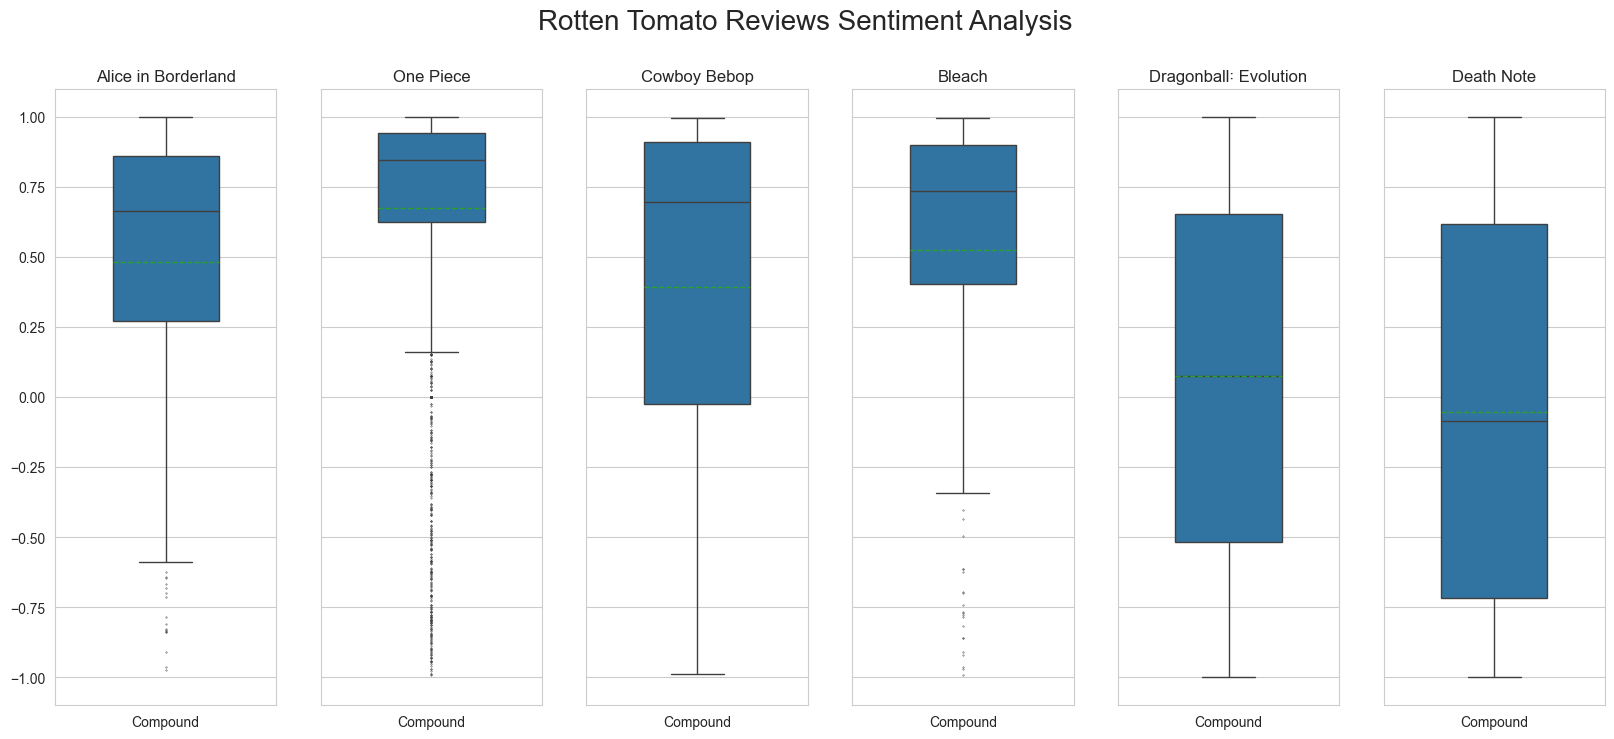

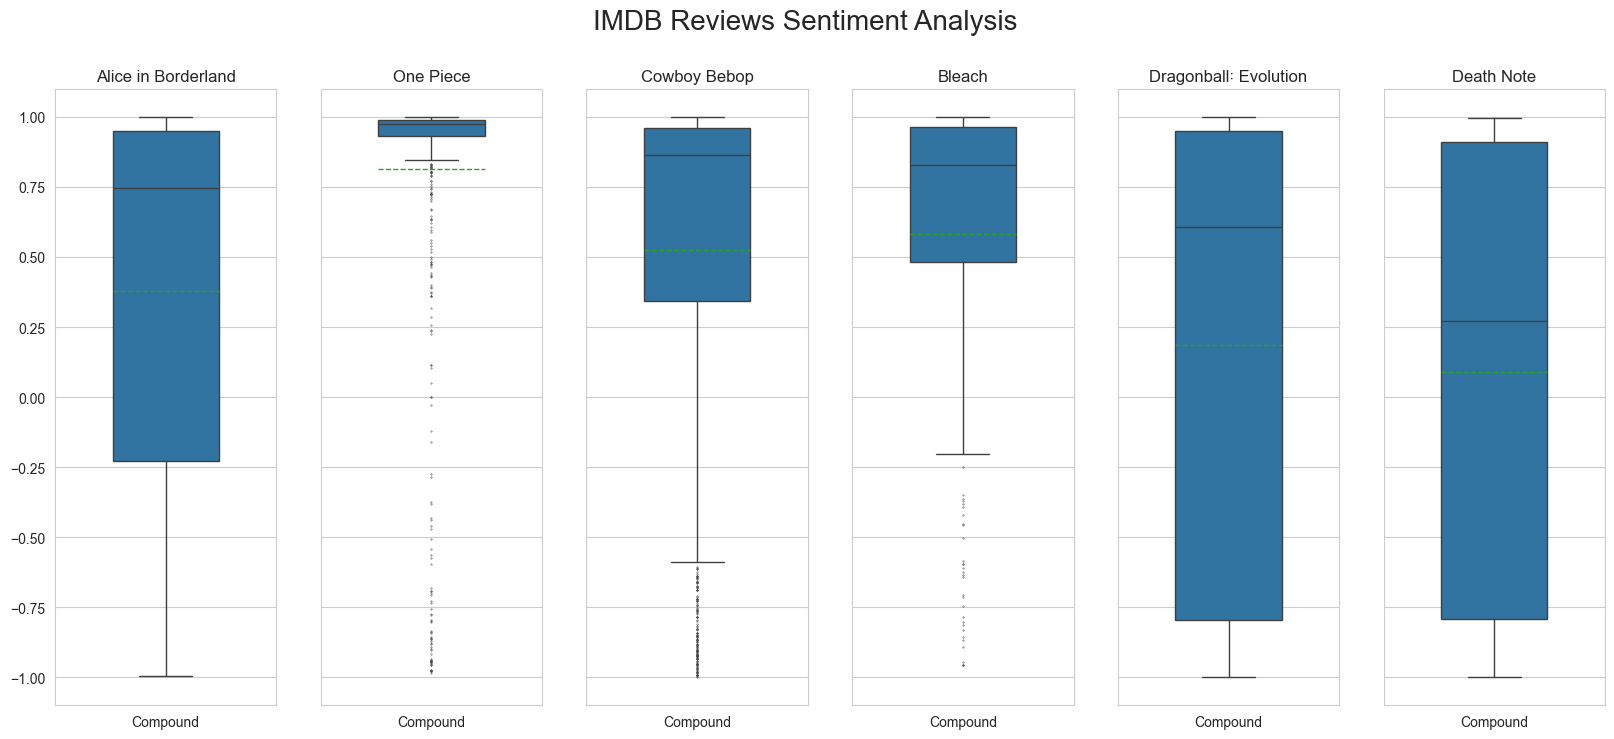

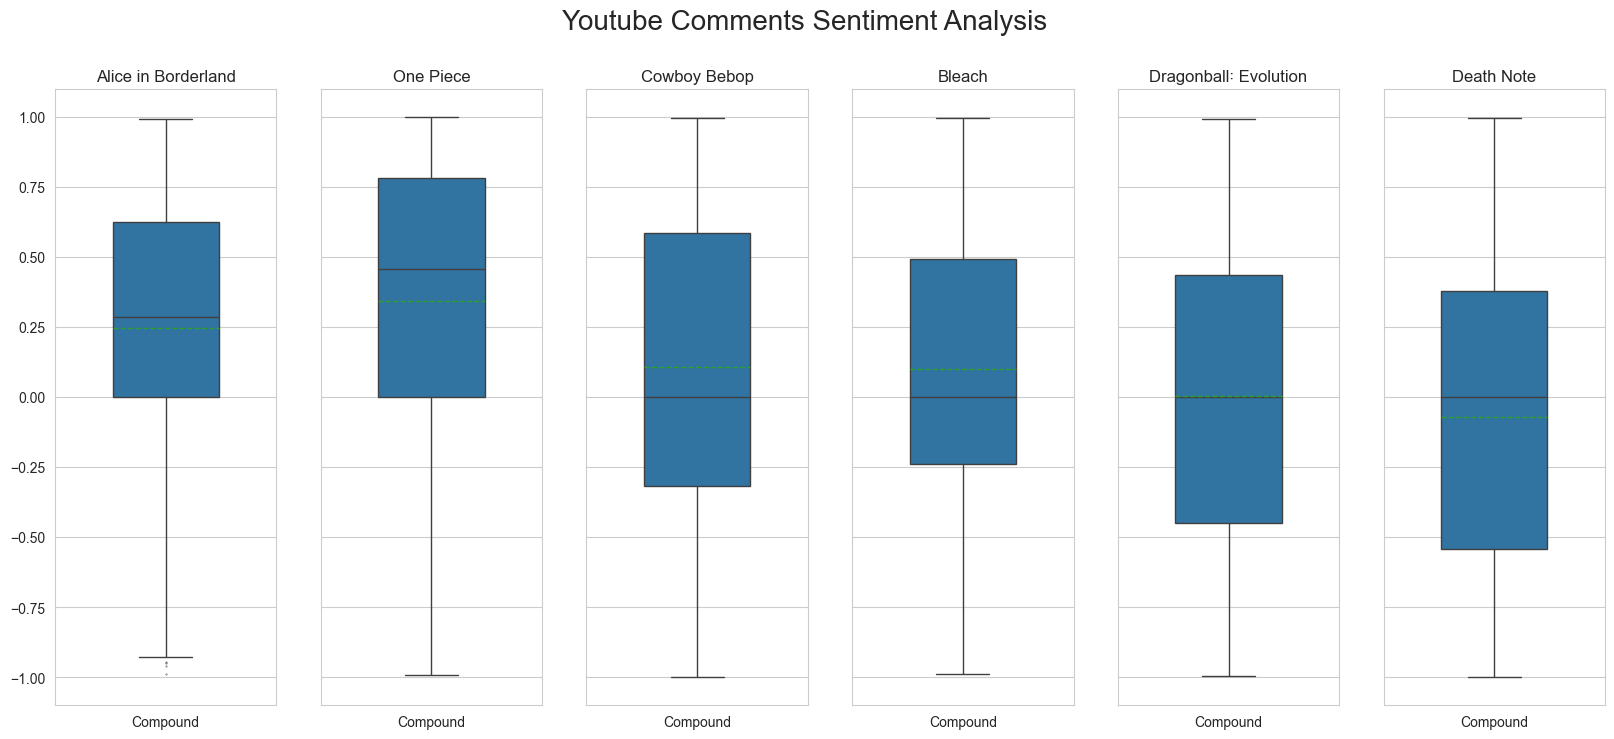

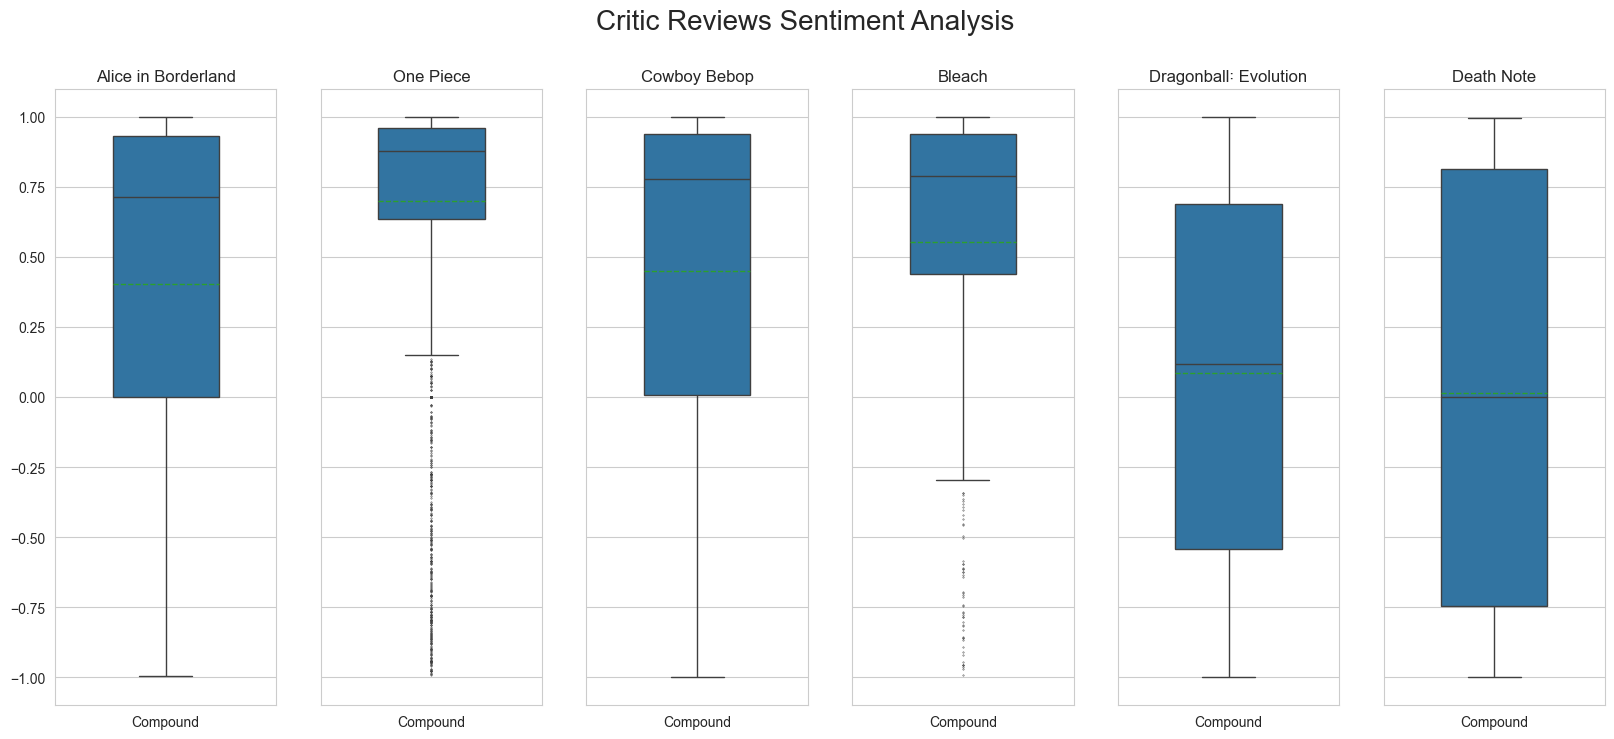

In [ ]:
plot_compounds(rotten_sentiments, "Rotten Tomato Reviews")
plot_compounds(imdb_sentiments, "IMDB Reviews")
plot_compounds(youtube_sentiments, "Youtube Comments")
plot_compounds(critic_sites_sentiments, "Critic Reviews")

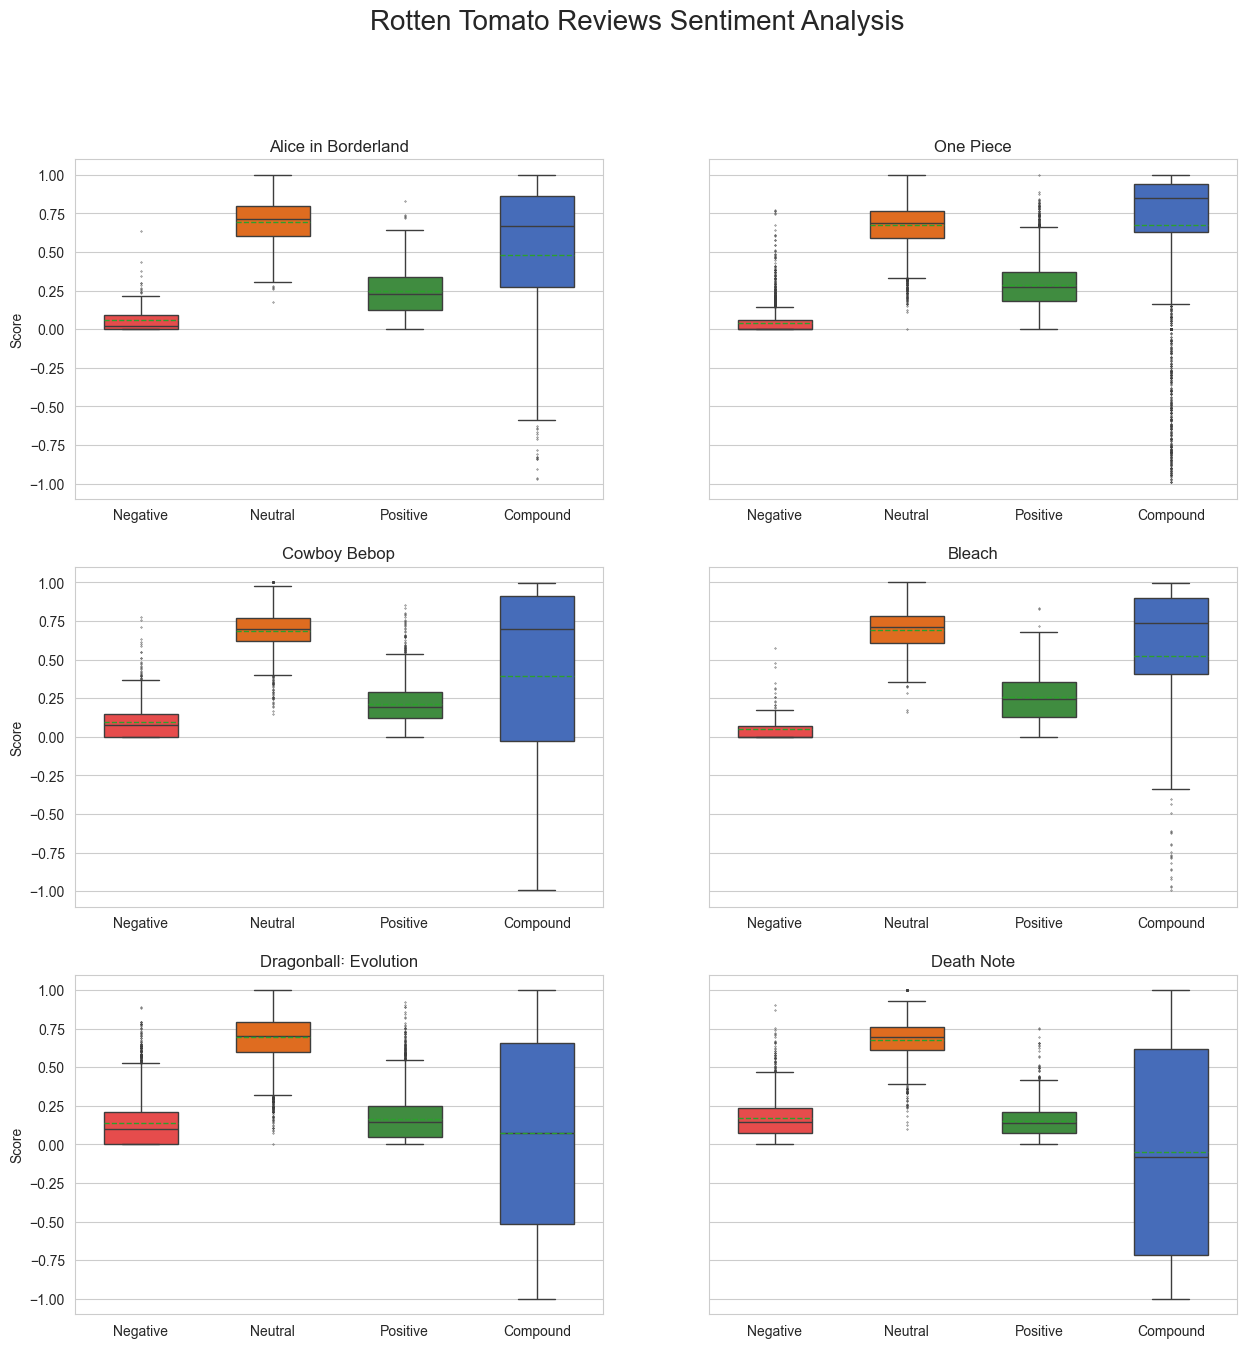

In [ ]:
plot_sentiments(rotten_sentiments, "Rotten Tomato Reviews")

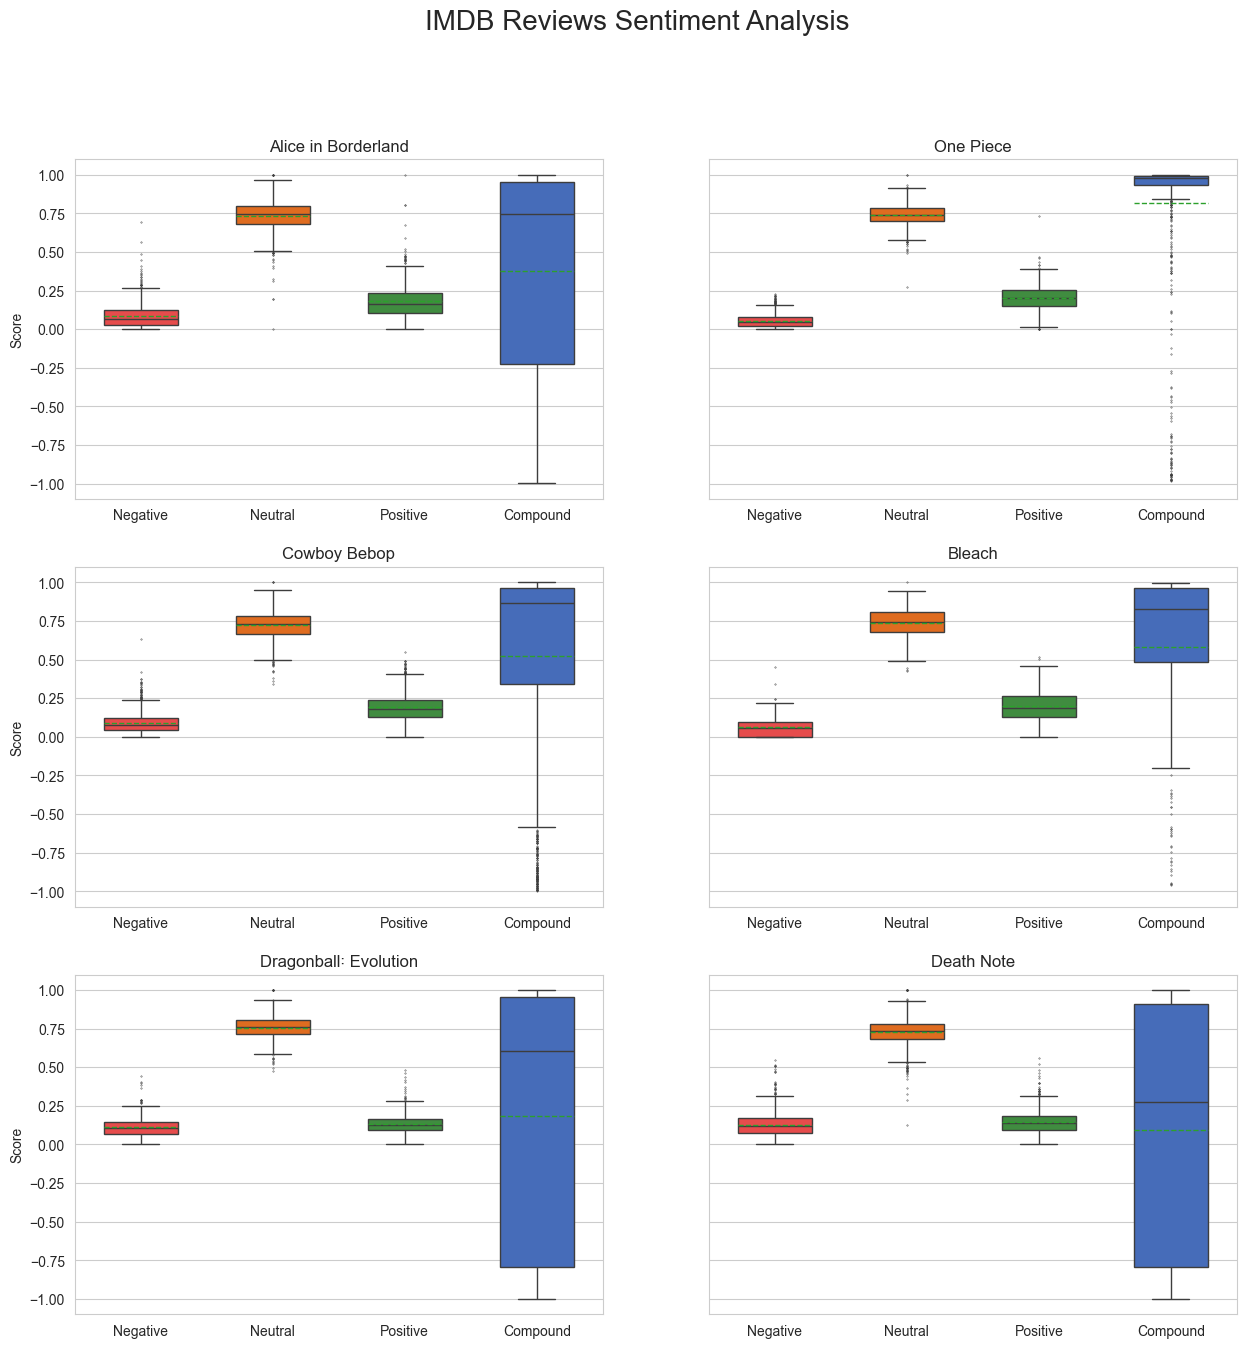

In [ ]:
plot_sentiments(imdb_sentiments, "IMDB Reviews")

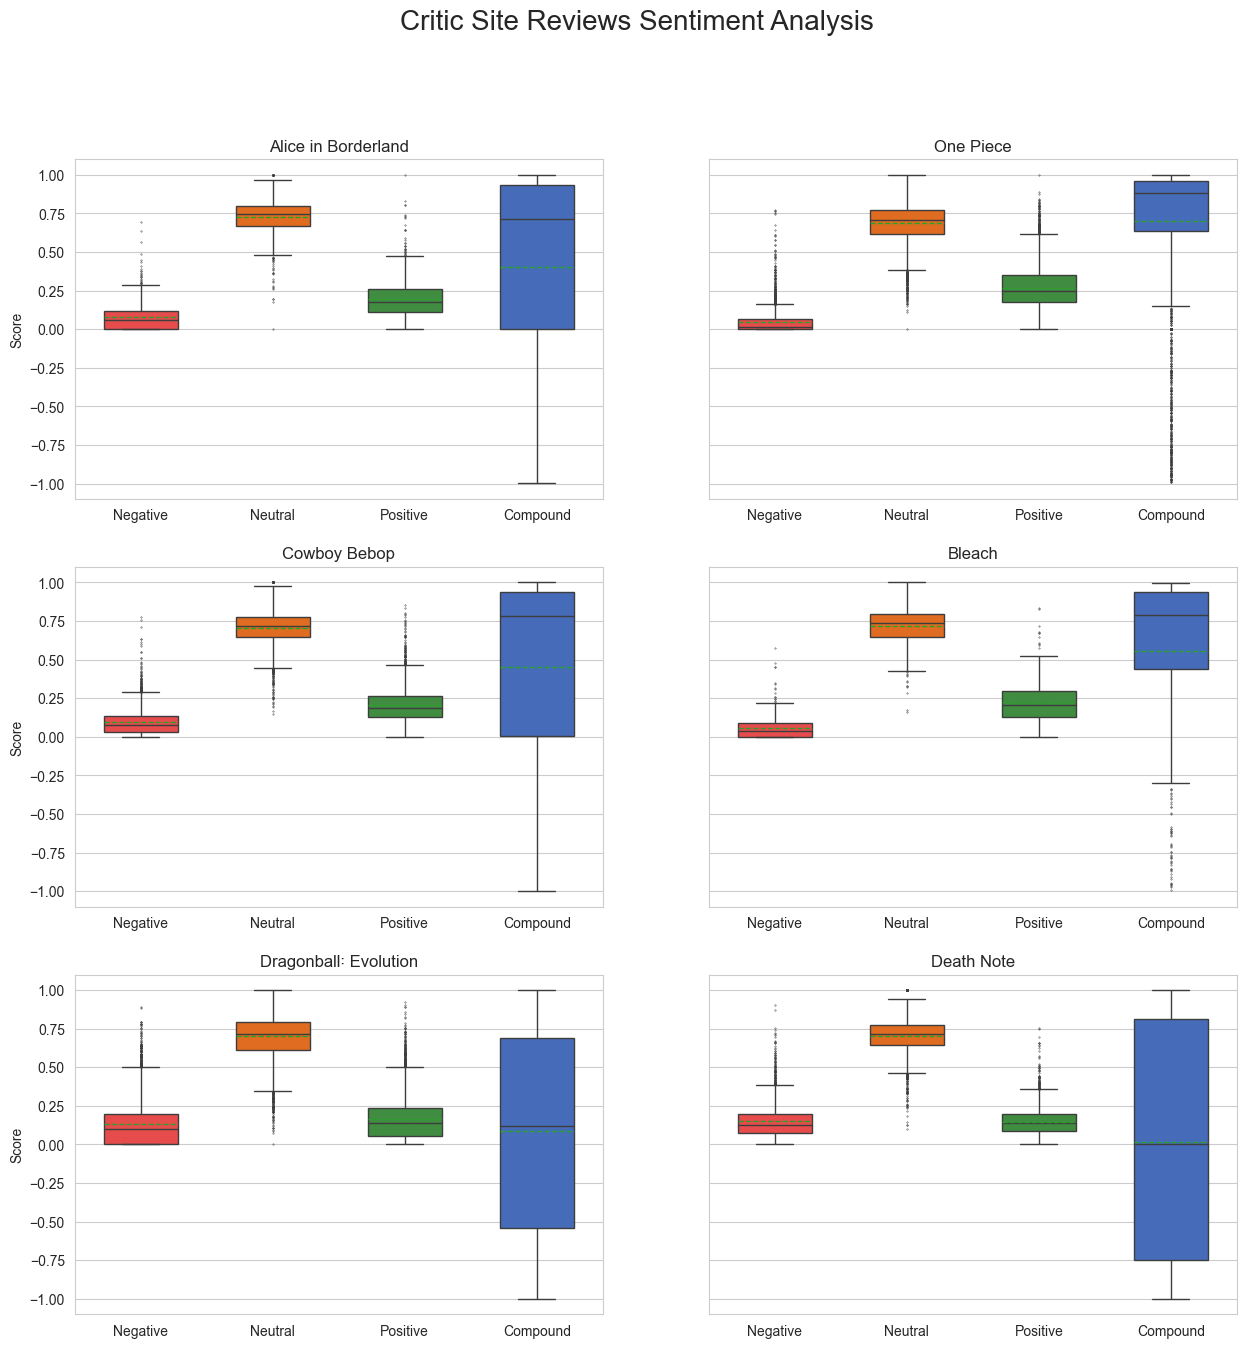

In [ ]:
plot_sentiments(critic_sites_sentiments, "Critic Site Reviews")

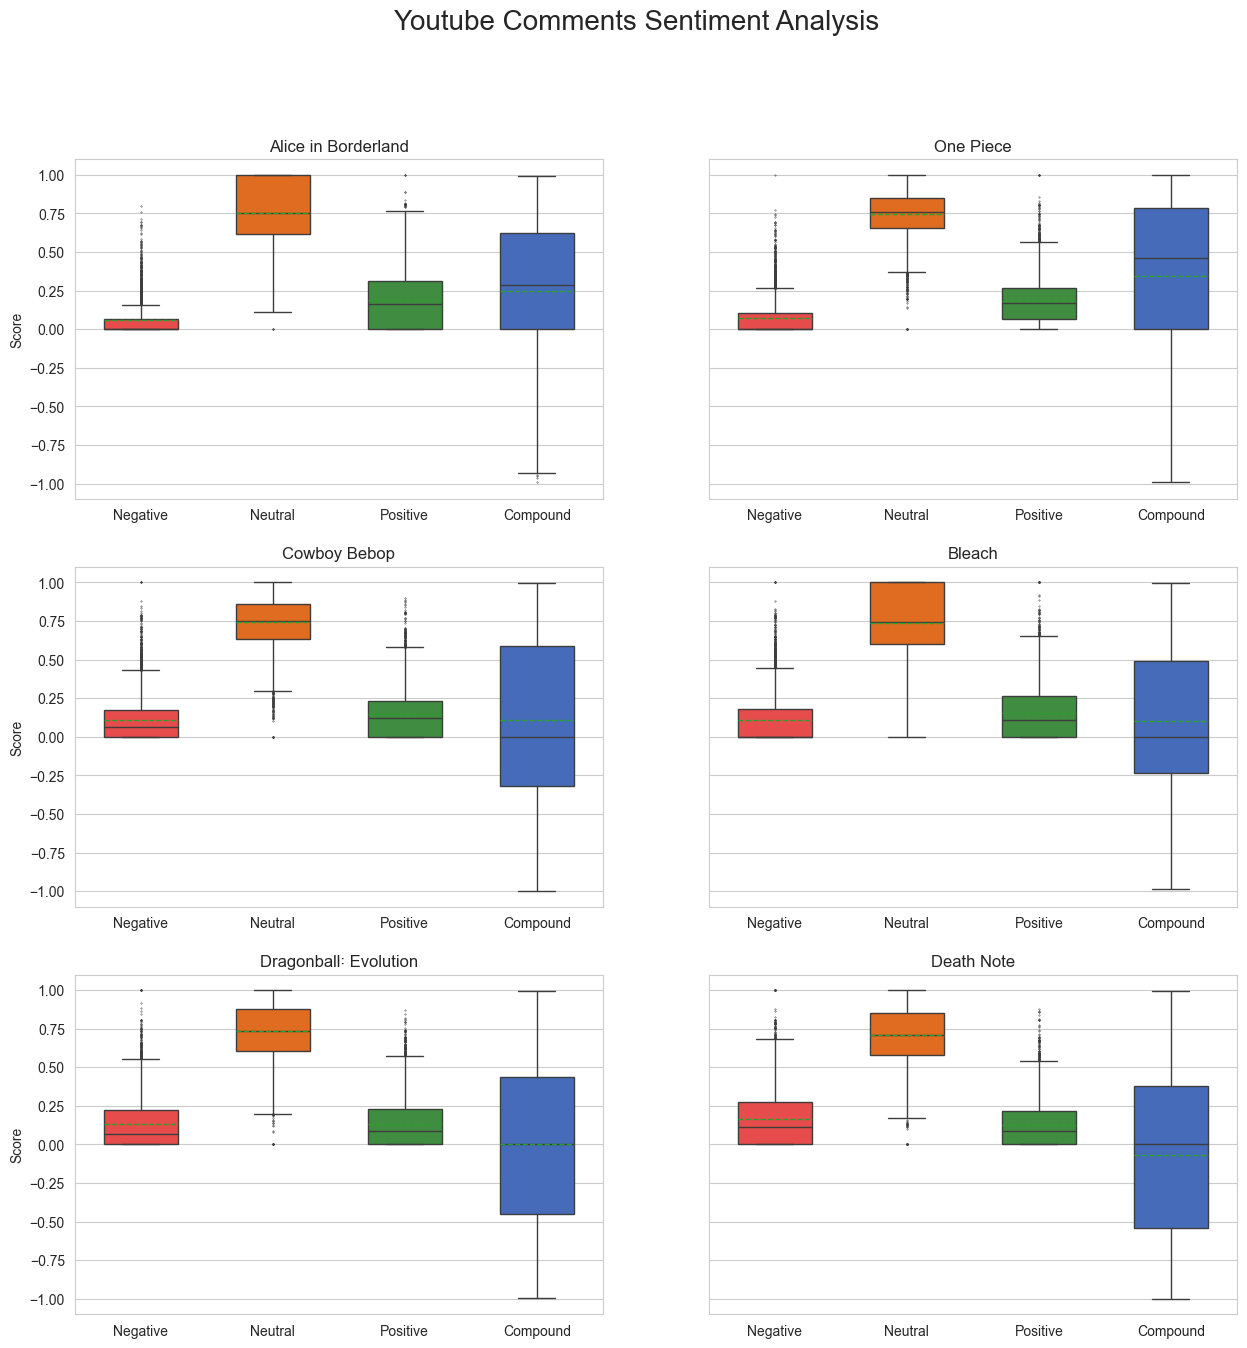

In [ ]:
plot_sentiments(youtube_sentiments, "Youtube Comments")

In [ ]:
def compare_sentiments(sentiments1, sentiments2, medium):
    plot_indices = [(i // 2, i % 2) for i in range(6)]  # maps natural numbers to a 2D array of size 3x2
    title = medium+' Sentiment Analysis'

    fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharey="all")
    fig.suptitle(medium+' Sentiment Analysis', fontsize=20)
    for i in range(6):
        combined_df = pd.concat({'Critic': sentiments1[i].melt(), 'Youtube': sentiments2[i].melt()}, names=['source', 'old_index'])  # melt the dataframe for sns processing
        reset_combined = combined_df.reset_index(level=0).reset_index(drop=True)
        reset_combined.rename(columns={"source": "Source", "variable": "Sentiment", "value": "Score"}, inplace=True)  # fix the variable names
        sns.set_style("whitegrid")
        my_pal = {"negative": "#ff3333",  "neutral": "#ff6600",   "positive": "#339933",  "compound": "#3366cc", "Critic": "#3366cc", "Youtube": "#ff3333"}
        sns.boxplot(data=reset_combined, x='Sentiment', y='Score', hue='Source', palette=my_pal, meanline=True, showmeans=True, gap=0.1, fliersize=0.35, ax=axs[plot_indices[i]])
        axs[plot_indices[i]].set_title(temp_titles[i])
        axs[plot_indices[i]].set_xticks(axs[plot_indices[i]].get_xticks())
        axs[plot_indices[i]].set(xlabel=None, xticklabels=["Negative", "Neutral", "Positive", "Compound"])

    plt.savefig("sentiment_analysis\\"+title+'.png')
    plt.show()

In [ ]:
def compare_compounds(sentiments1, sentiments2, medium):
    plot_indices = [(i // 2, i % 2) for i in range(6)]  # maps natural numbers to a 2D array of size 3x2
    title = medium+' Sentiment Analysis'

    fig, axs = plt.subplots(1, 6, figsize=(30, 8), sharey="all")
    fig.suptitle(medium+' Sentiment Analysis', fontsize=20)
    for i in range(6):
        senti1 = sentiments1[i]
        senti2 = sentiments2[i]
        comp1 = senti1['compound']
        comp2 = senti2['compound']
        comp1.name='Score'
        comp2.name='Score'
        combined_df = pd.concat({'Critic': comp1, 'Youtube': comp2}, names=['source', 'old_index'])  # melt the dataframe for sns processing
        reset_combined = combined_df.reset_index(level=0).reset_index(drop=True)
        sns.set_style("whitegrid")
        my_pal = {"compound": "#3366cc", "Critic": "#3366cc", "Youtube": "#ff3333"}
        sns.boxplot(data=reset_combined, y='Score', hue='source', palette=my_pal, meanline=True, showmeans=True, legend=False, gap=0.3, fliersize=0.35, ax=axs[i])
        axs[i].set_title(temp_titles[i]) #currently using temp titles
        axs[i].set_xticks(axs[i].get_xticks())
        axs[i].set(xlabel=None, xticklabels=["Compound"])

    plt.savefig("sentiment_analysis\\"+title+'.png')
    plt.show()

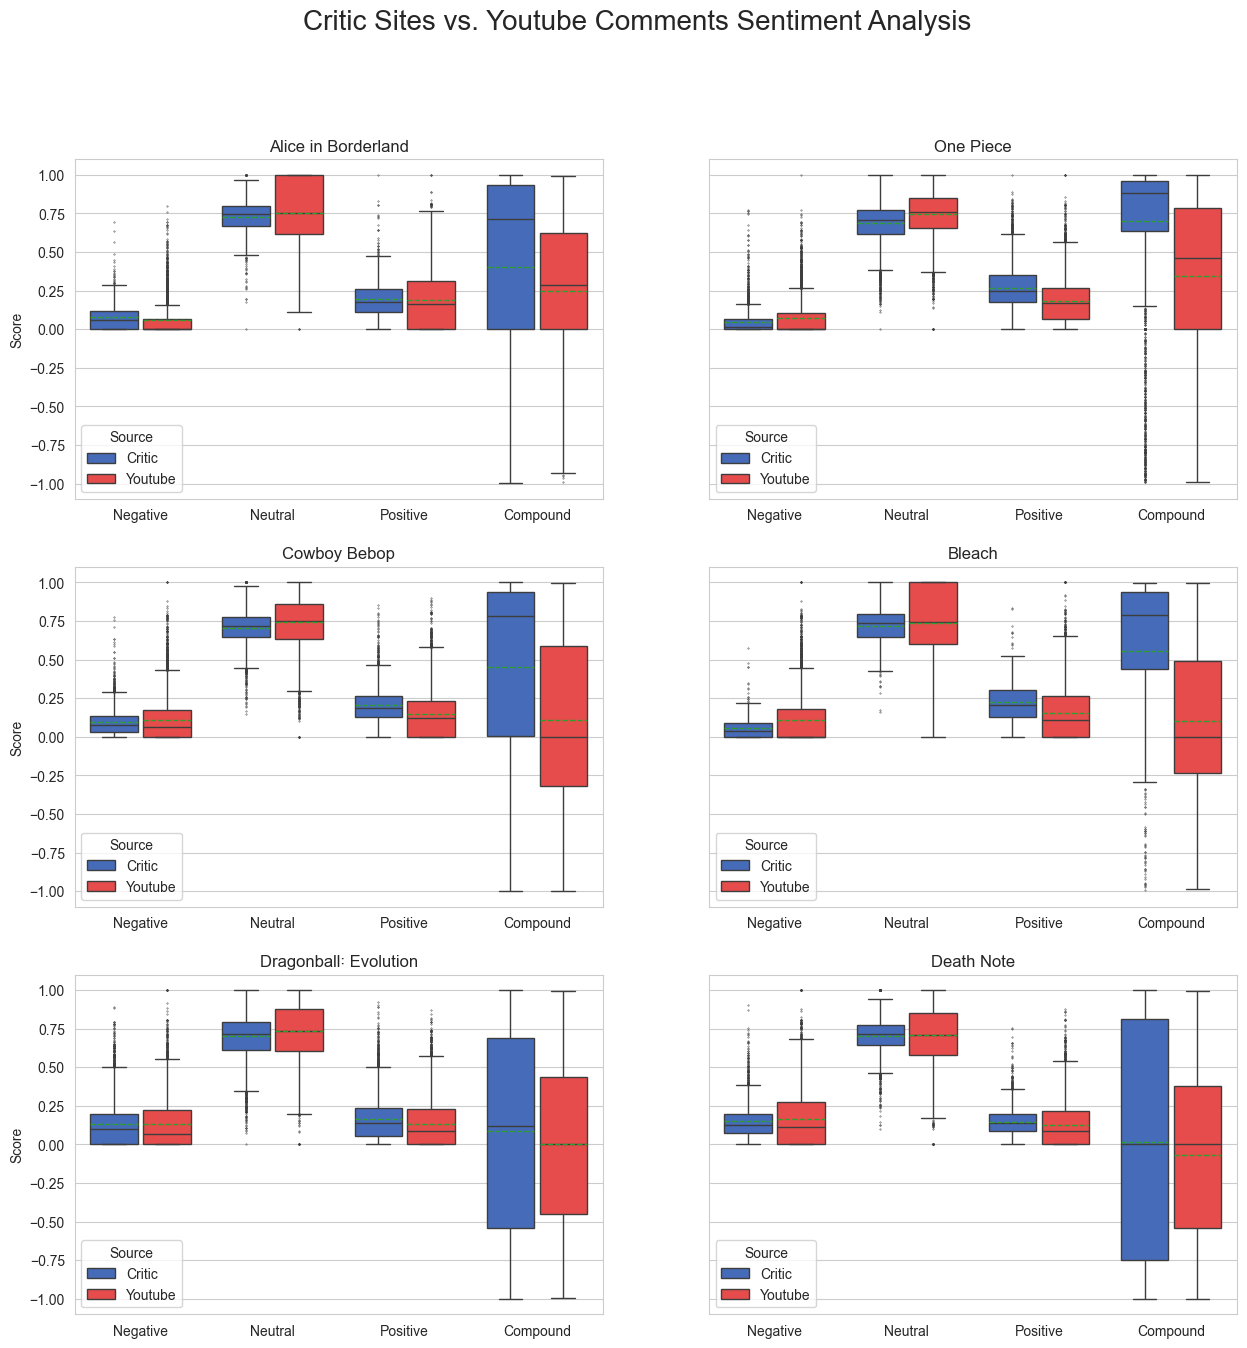

In [ ]:
compare_sentiments(critic_sites_sentiments, youtube_sentiments, "Critic Sites vs. Youtube Comments")

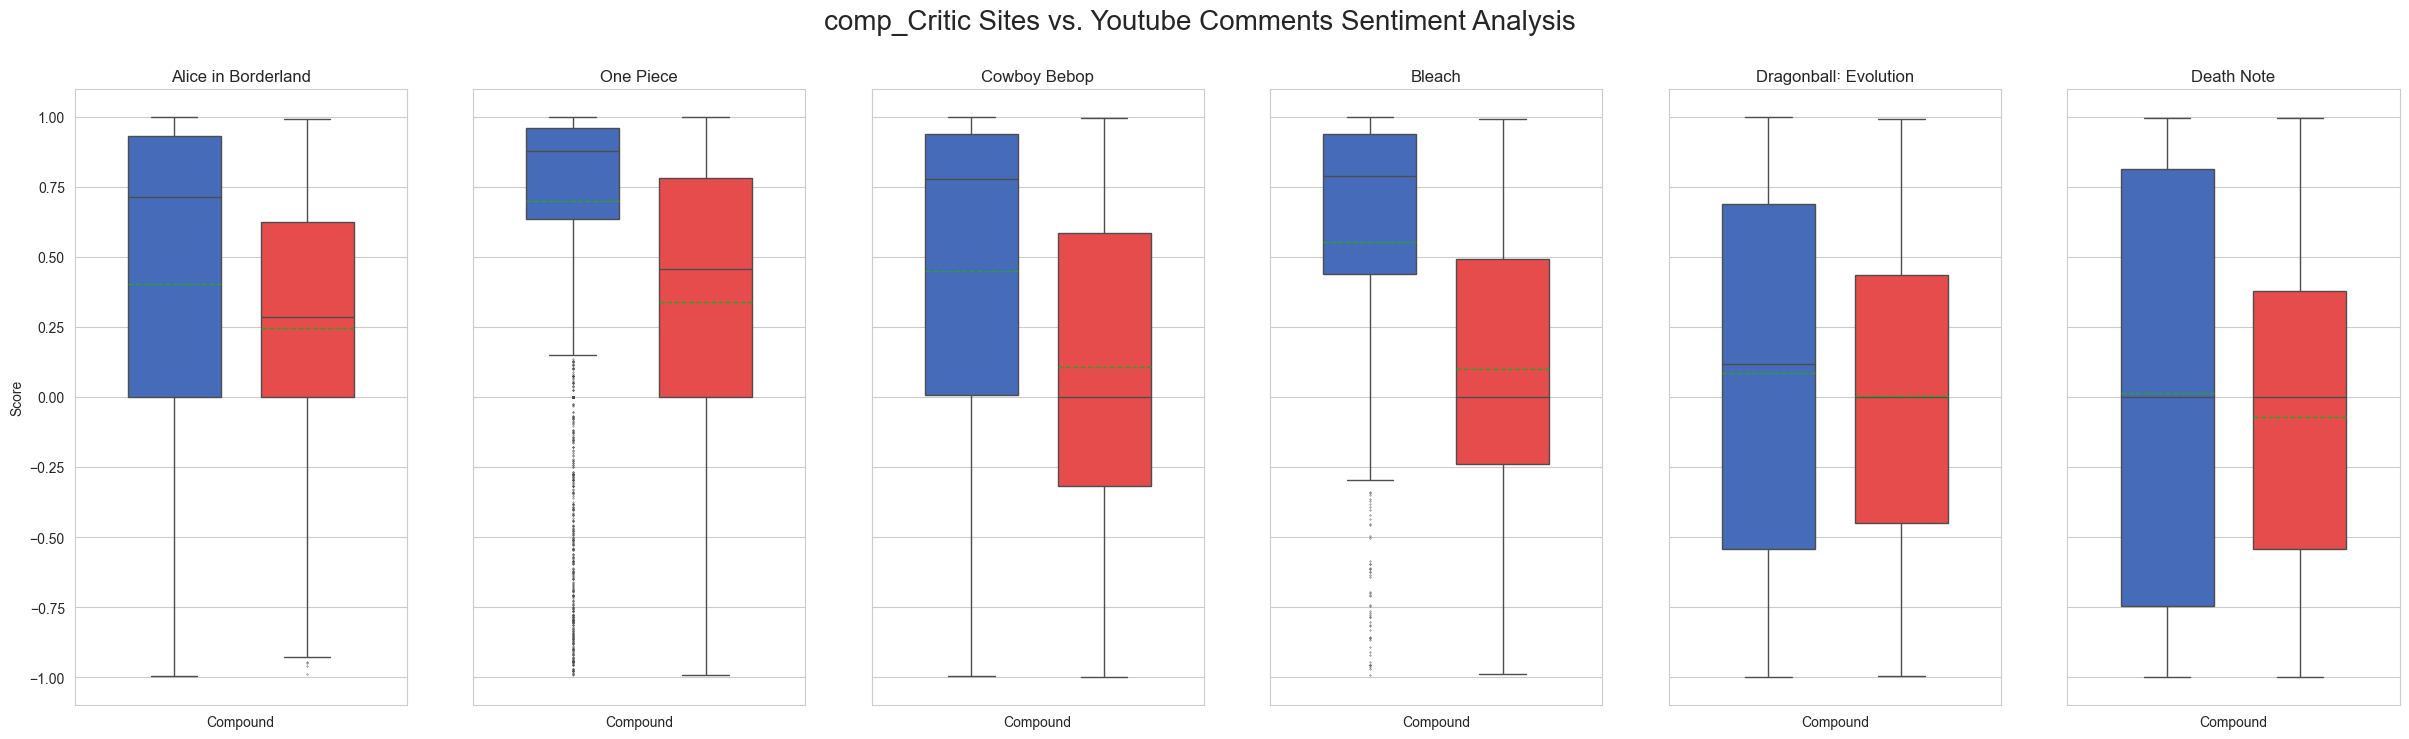

In [ ]:
compare_compounds(critic_sites_sentiments, youtube_sentiments, "comp_Critic Sites vs. Youtube Comments")

# Term Frequency-Based Analysis

In [20]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [22]:
def remove_stopwords_tfidf(texts, additional_stopwords):
    stop_words = stopwords.words('english')
    stop_words.extend(additional_stopwords)
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def tfidf(texts, tf_idf_threshold):
    id2word_dic = corpora.Dictionary(texts)
    corpus_bow = [id2word_dic.doc2bow(text) for text in texts]
    tfidf_model = TfidfModel(corpus_bow, id2word=id2word_dic)

    low_value = tf_idf_threshold
    words = []
    words_missing_in_tfidf = []
    for i in range(0, len(corpus_bow)):
        bow = corpus_bow[i]
        low_value_words = [id for id, value in tfidf_model[bow] if value < low_value]
        drops = low_value_words+words_missing_in_tfidf
        for item in drops:
            words.append(id2word_dic[item])

    return words

def remove_tfidf(texts, tf_idf_threshold):
    stop = tfidf(texts, tf_idf_threshold)
    cleaned = remove_stopwords_tfidf(texts, stop)
    return cleaned

In [27]:
def term_frequency(words_list, medium):
    vectorizer = CountVectorizer(stop_words=stop_words, max_features=2000)
    for i in range(len(words_list)):
        series = pd.Series(' '.join(x) for x in words_list[i])
        matrix = vectorizer.fit_transform(series)
        matrix.toarray()

        vectorizer.get_feature_names_out()

        matrix.sum(axis=1)

        vectorizer.vocabulary_.items()

        total_per_ngram = matrix.sum(axis=0)
        frequency = [(w, total_per_ngram[0, i]) for w, i in vectorizer.vocabulary_.items()]

        frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])

        frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
        frequency.to_excel("term_frequency\\" + medium + "\\" + titles[i] + "_term_frequency.xlsx", index=False)
        print(frequency.head(50))

def create_wordcloud(text, path, max_words=100):
    strings = ''
    # Transform text for WordCloud
    strings = pd.Series(' '.join(x) for x in text)
    strings = ' '.join(strings)

    # Generate wordcloud image
    wc = WordCloud(
        background_color="white",
        # colormap='plasma',
        max_words=max_words
    )
    wc.generate(strings)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.close()
    wc.to_file(path)

#sns.set(rc={'figure.figsize':(12,6)})
def visualize_frequency(path, medium):
    plot_indices = [(i // 2, i % 2) for i in range(6)]  # maps natural numbers to a 2D array of size 3x2
    title = 'Term Frequency (TF-IDF Applied) ['+medium+']'

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle(title, fontsize=20)

    for i in range(len(titles)):
        frequency = pd.read_excel(path[i])
        sns.set_style("whitegrid")
        sns.barplot(data=frequency.head(25), x='term', y='frequency', hue ='term', ax=axs[plot_indices[i]])
        axs[plot_indices[i]].set_title(titles[i])
        #axs[plot_indices[i]].xaxis.set_ticks(frequency['frequency'])
        axs[plot_indices[i]].set_xticklabels(labels = frequency['term'],rotation=50, ha='right')

    fig.tight_layout()
    plt.savefig("term_frequency\\"+title+'.png')
    plt.show()

In [29]:
term_frequency(youtube_preprocessed, "youtube")

OSError: Cannot save file into a non-existent directory: 'term_frequency\youtube'

In [30]:
youtube_frequency_paths = glob.glob("term_frequency1\\youtube\\*.xlsx")
youtube_frequency_paths

[]

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\o

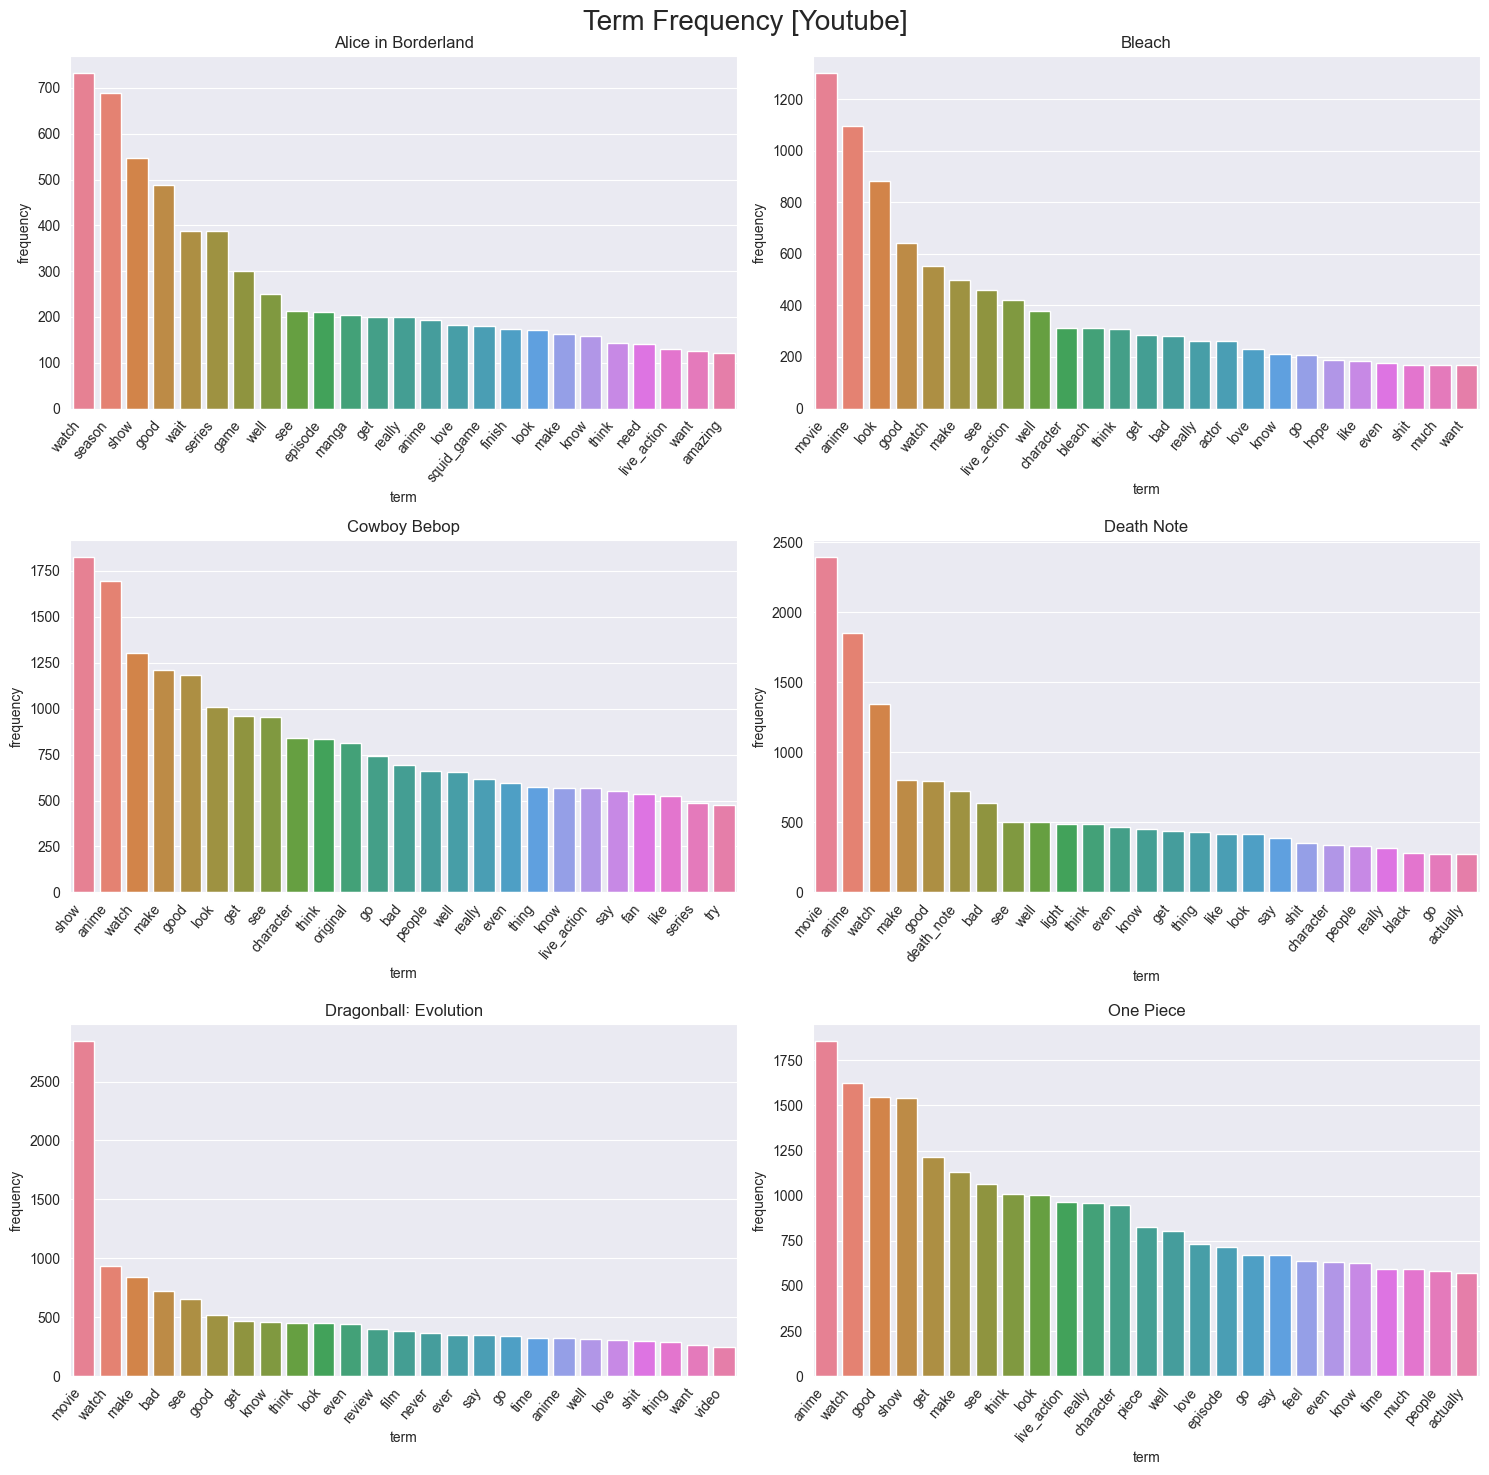

In [ ]:
visualize_frequency(youtube_frequency_paths, "Youtube")

Critic Sites

In [42]:
term_frequency(critic_sites_preprocessed, "critic")

           term  frequency
0          show        780
1          game        622
2         watch        613
3     character        601
4        series        600
5          good        500
6        season        468
7        really        385
8           get        378
9          well        364
10      episode        359
11         make        331
12        story        291
13        great        257
14          see        254
15          end        242
16         time        236
17           go        232
18         feel        220
19         much        216
20        think        215
21         love        212
22       people        205
23         also        201
24          bad        196
25         plot        187
26         even        182
27          way        176
28  interesting        175
29        start        174
30       acting        169
31         know        161
32         like        158
33         give        157
34          say        153
35          lot        151
3

In [ ]:
critic_sites_frequency_paths = glob.glob("term_frequency1\\critic\\*.xlsx")
critic_sites_frequency_paths

['term_frequency1\\critic\\Alice in Borderland_term_frequency.xlsx',
 'term_frequency1\\critic\\Bleach_term_frequency.xlsx',
 'term_frequency1\\critic\\Cowboy Bebop_term_frequency.xlsx',
 'term_frequency1\\critic\\Death Note_term_frequency.xlsx',
 'term_frequency1\\critic\\Dragonball꞉ Evolution_term_frequency.xlsx',
 'term_frequency1\\critic\\One Piece_term_frequency.xlsx']

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3729025165.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\o

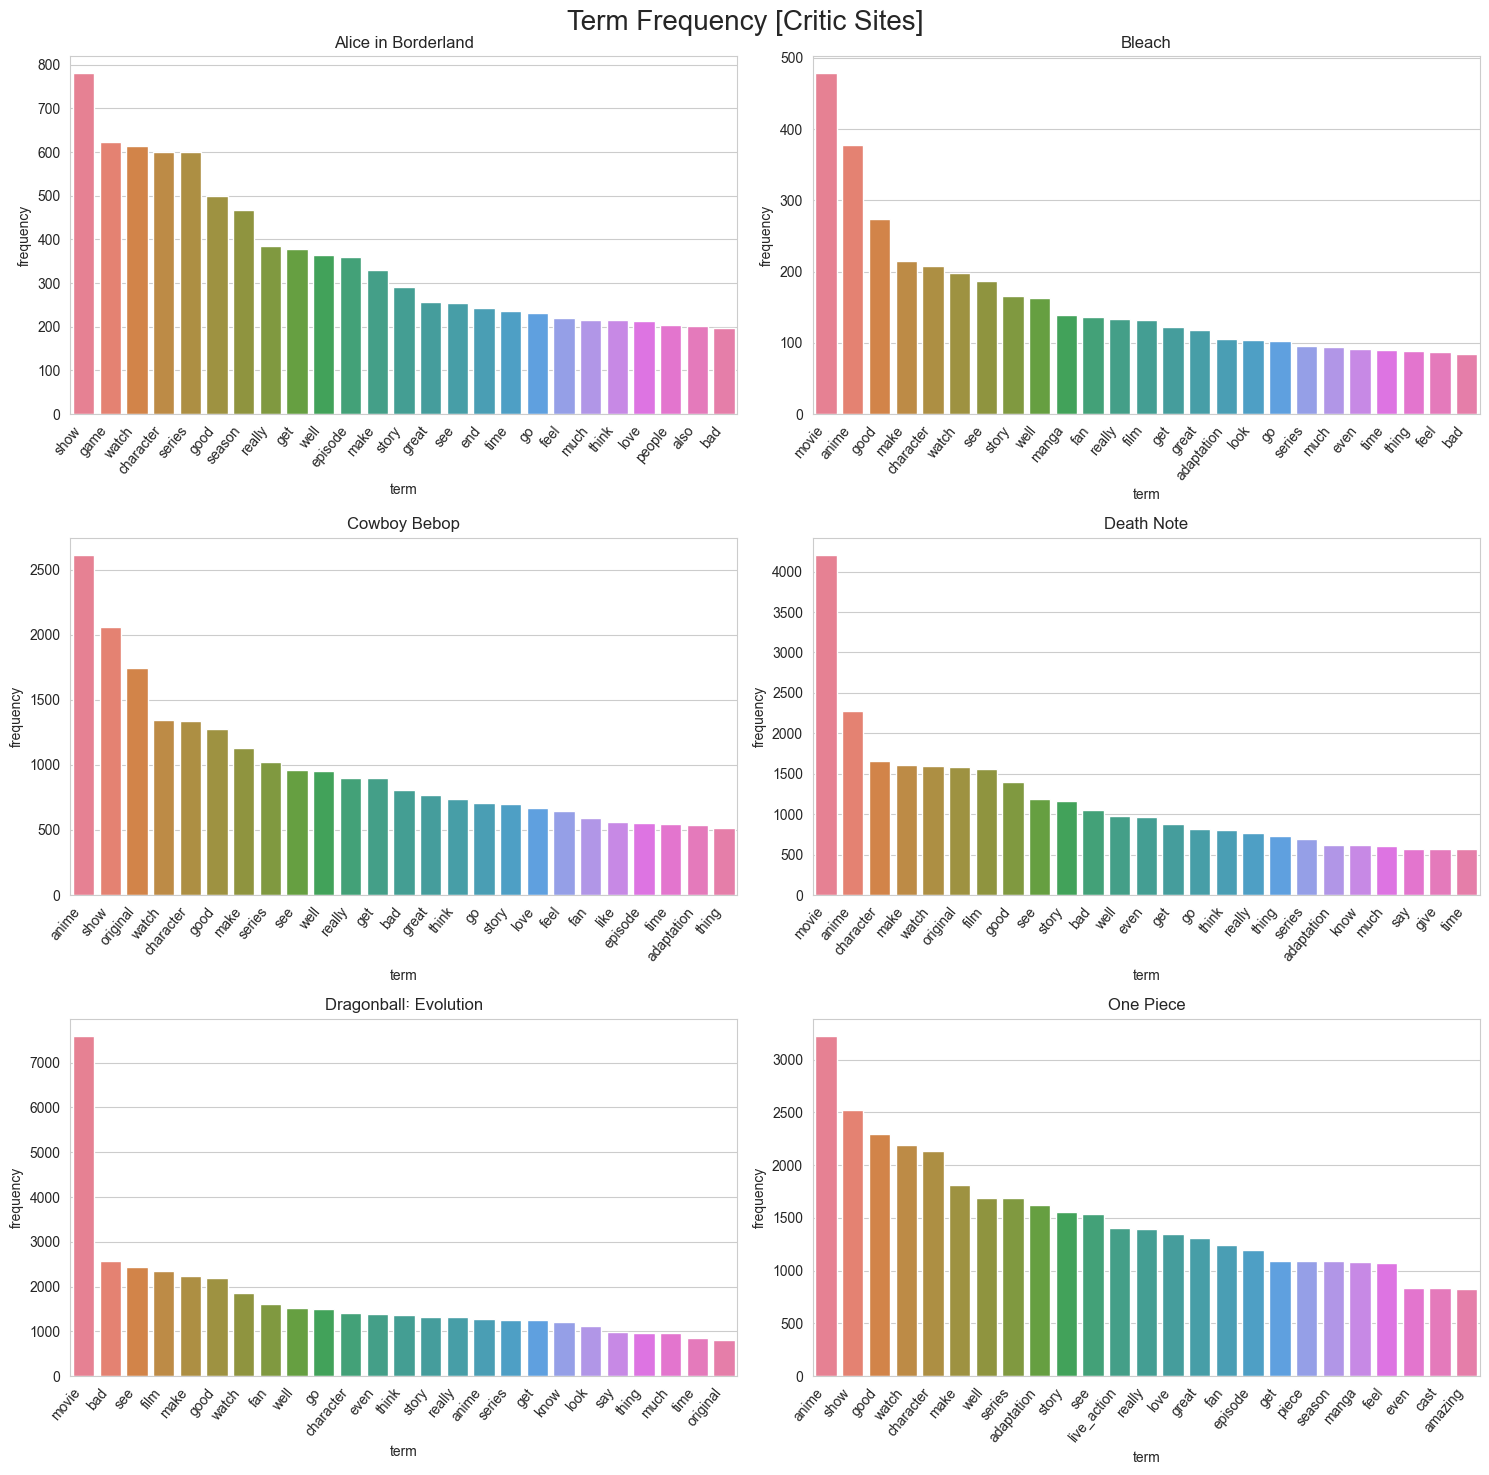

In [ ]:
visualize_frequency(critic_sites_frequency_paths, "Critic Sites")

### Applying TF-IDF

In [31]:
youtube_tfidf = []
for words in youtube_preprocessed:
    youtube_tfidf.append(remove_tfidf(words, 0.07))

In [33]:
youtube_tfidf

[[['today', 'bcz', 'comment', 'regret'],
  ['switch', 'rule'],
  ['boare'],
  ['confirm'],
  [],
  ['serious', 'honestly', 'incerdible', 'level'],
  [],
  [],
  ['dub', 'hate', 'subtitle'],
  [],
  [],
  ['announce', 'last', 'week'],
  [],
  [],
  [],
  ['experience'],
  ['announce', 'yesterday'],
  ['renew', 'cheer'],
  ['wanna', 'song'],
  ['kiss', 'romantic'],
  [],
  ['explain', 'narrator', 'translate'],
  [],
  ['squid', 'slow', 'rate'],
  [],
  ['boring'],
  ['anime', 'setting', 'confused'],
  ['regret', 'hear', 'comment', 'try', 'genre', 'taste'],
  ['last', 'confused', 'fun'],
  ['worthy'],
  ['today', 'superbbbb', 'mindblowing'],
  ['kid'],
  ['definetly', 'mindblowe'],
  ['particularly', 'kinda', 'main', 'duo', 'plot', 'armor', 'kill'],
  ['st', 'later', 'today', 'solid', 'binge'],
  ['garbage', 'especially', 'hero', 'boy', 'cry', 'scared', 'else'],
  [],
  [],
  ['joker'],
  ['encouragement', 'exciting', 'fun', 'interesting', 'rly'],
  ['yesterday',
   'href',
   'https',
  

In [48]:
critic_sites_tfidf = []
for words in critic_sites_preprocessed:
    critic_sites_tfidf.append(remove_tfidf(words, 0.05))

Youtube

In [34]:
term_frequency(youtube_tfidf, "youtube")

           term  frequency
0         manga        220
1         anime        211
2   live_action        138
3       trailer         86
4          name         71
5         thing         68
6    read_manga         66
7         drama         65
8           bad         64
9        remind         63
10   borderland         61
11         hype         61
12          lol         59
13        start         59
14        binge         56
15    different         54
16       acting         54
17    literally         53
18         next         52
19          cry         50
20         shit         49
21        actor         48
22         many         48
23      similar         47
24       pretty         45
25      comment         44
26         film         44
27         cool         44
28          dub         43
29         hate         43
30         live         43
31  masterpiece         43
32         last         42
33          try         41
34  interesting         41
35         stop         41
3

IndexError: list index out of range

In [ ]:
youtube_frequency_tfidf_paths = glob.glob("term_frequency\\youtube\\*.xlsx")
youtube_frequency_tfidf_paths

['term_frequency\\youtube\\Alice in Borderland_term_frequency.xlsx',
 'term_frequency\\youtube\\Bleach_term_frequency.xlsx',
 'term_frequency\\youtube\\Cowboy Bebop_term_frequency.xlsx',
 'term_frequency\\youtube\\Death Note_term_frequency.xlsx',
 'term_frequency\\youtube\\Dragonball꞉ Evolution_term_frequency.xlsx',
 'term_frequency\\youtube\\One Piece_term_frequency.xlsx']

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\o

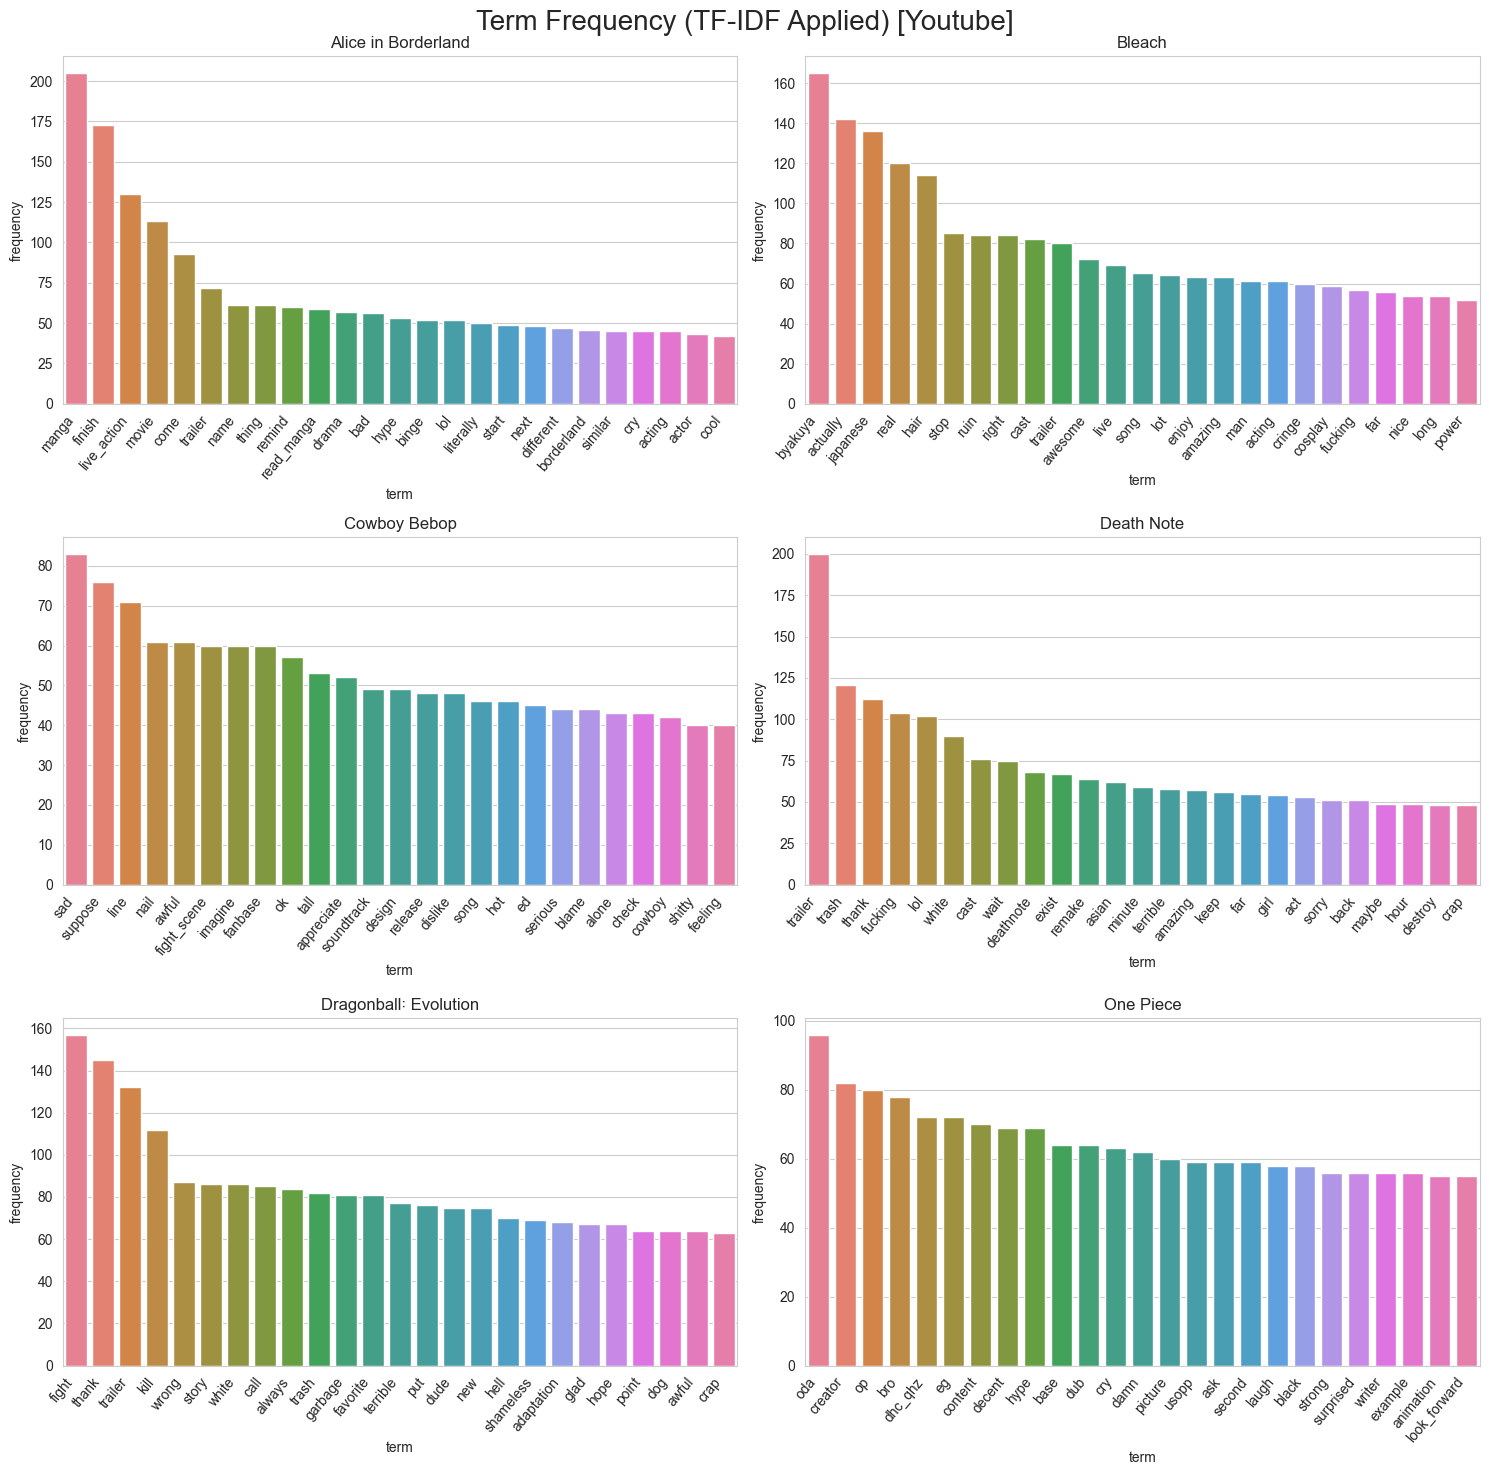

In [ ]:
visualize_frequency(youtube_frequency_tfidf_paths, "Youtube")

Critic Sites

In [45]:
term_frequency(critic_sites_tfidf, "critic")

In [46]:
critic_sites_frequency_tfidf_paths = glob.glob("term_frequency\\critic\\*.xlsx")
critic_sites_frequency_paths

NameError: name 'critic_sites_frequency_paths' is not defined

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\oyutn\AppData\Local\Temp\ipykernel_25344\3061022798.py:56: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\o

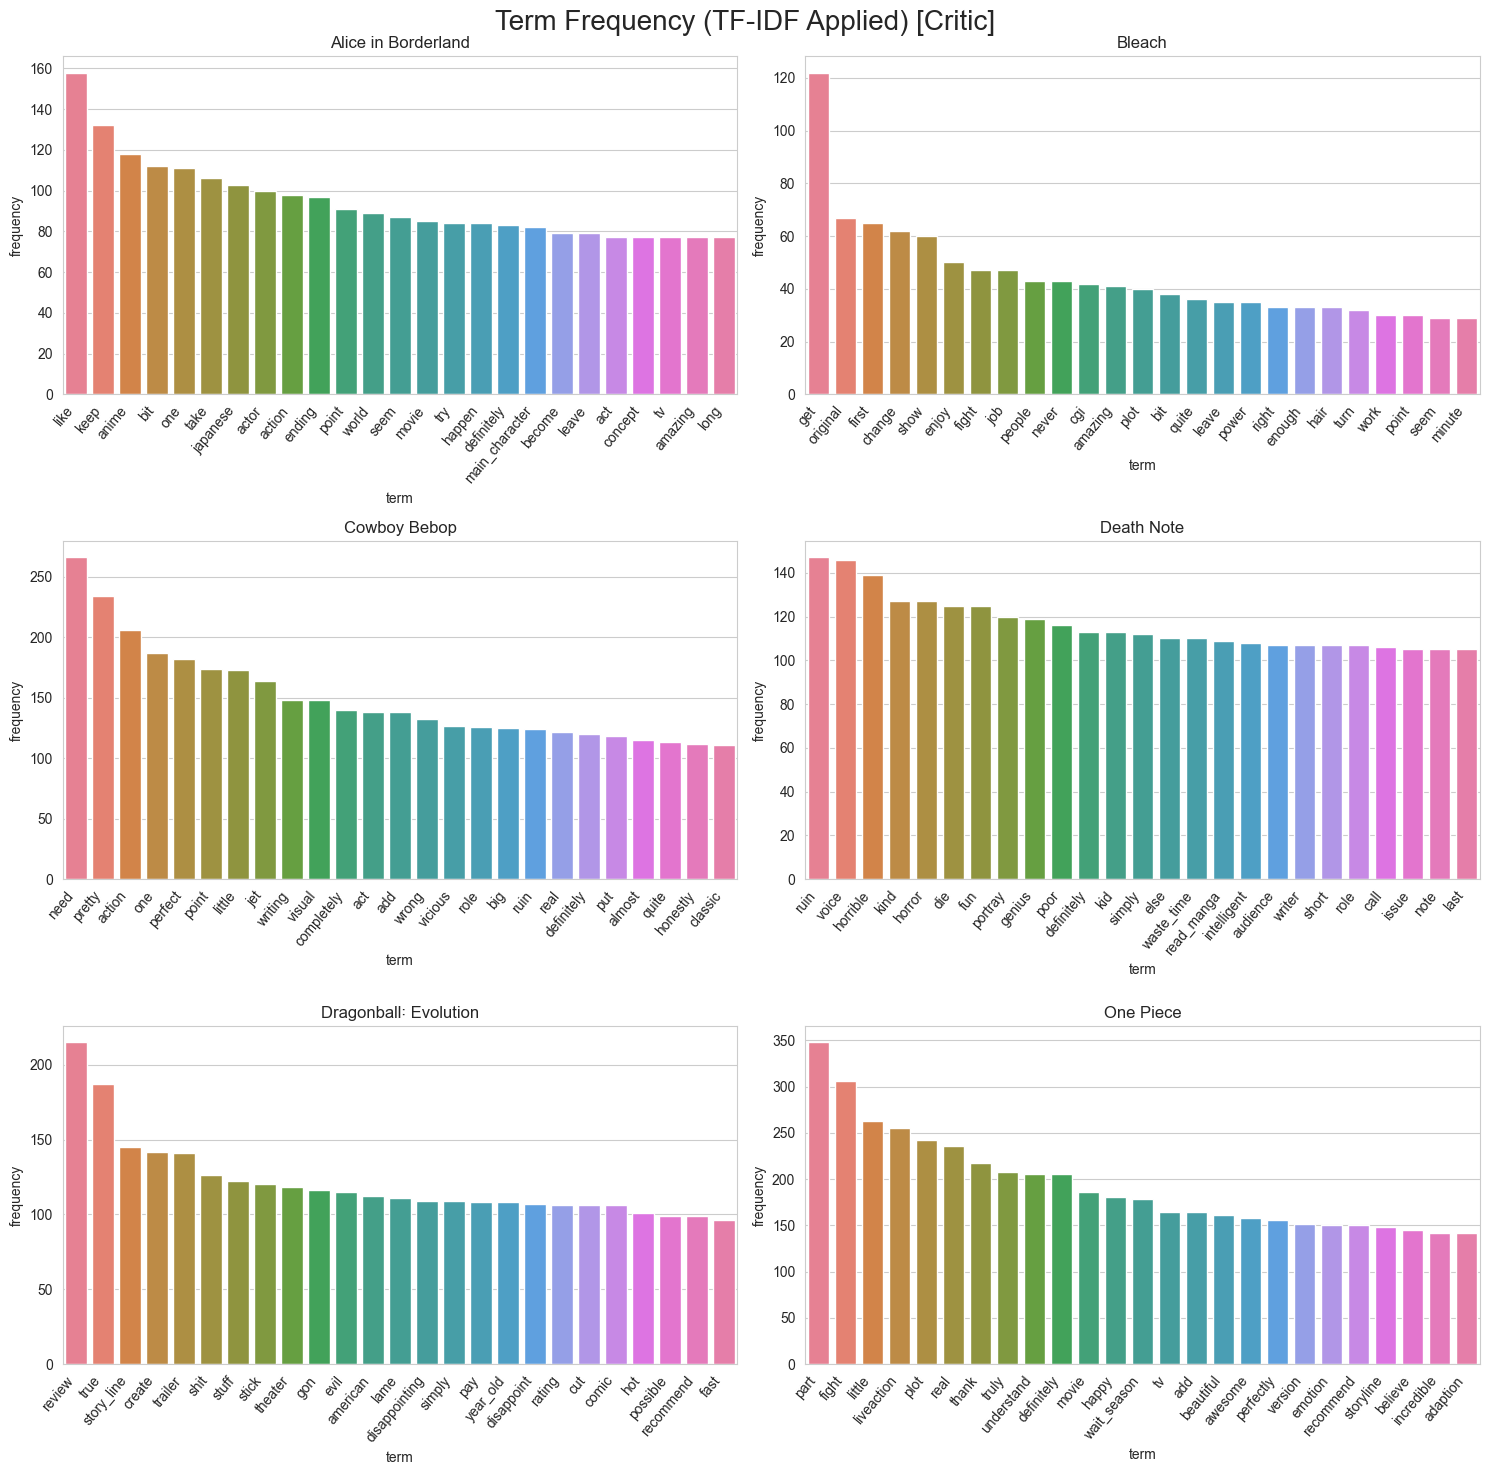

In [ ]:
visualize_frequency(critic_sites_frequency_tfidf_paths, "Critic")

In [ ]:
all_tfidf = pd.DataFrame()
for item in critic_sites_tfidf:
    pd.concat([all_tfidf, item])

for item in youtube_tfidf:
    pd.concat([all_tfidf, item])

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



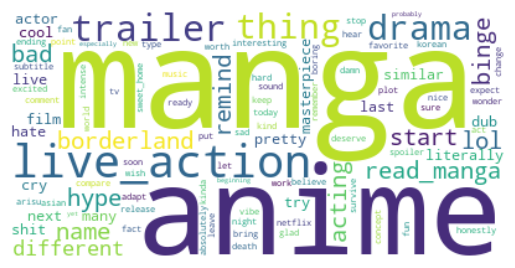

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



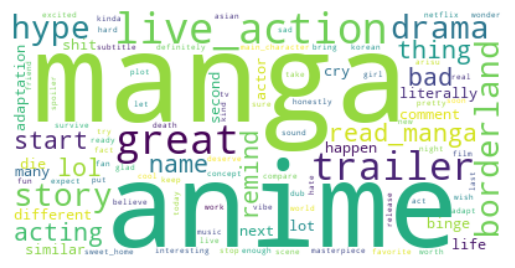

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



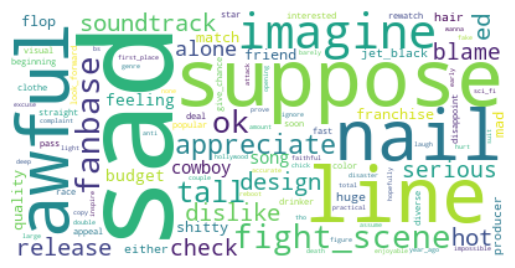

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



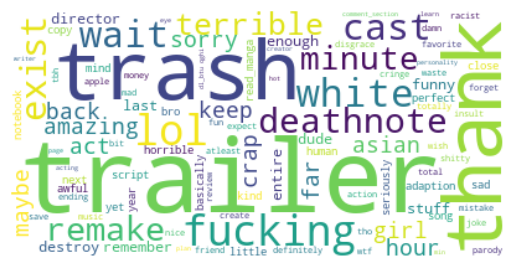

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



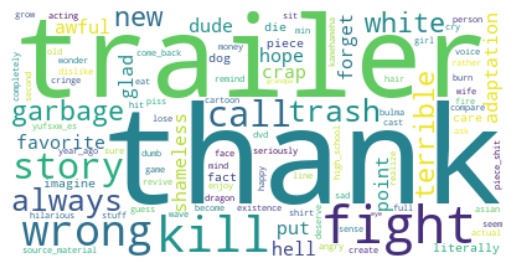

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



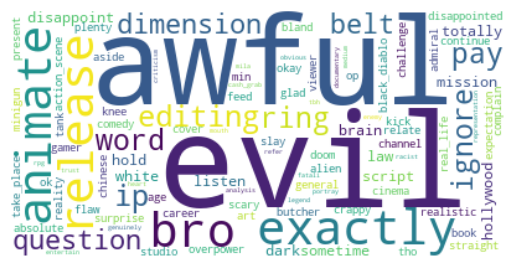

IndexError: list index out of range

In [36]:
for i in range(len(youtube_tfidf)):
    path = 'term_frequency/youtube/wordcloud/youtube_' + titles[i] + '_wordcloud.png'
    create_wordcloud(youtube_tfidf[i], path)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



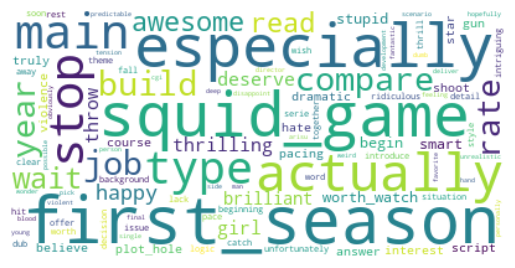

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



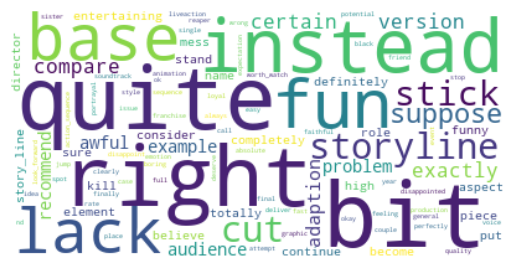

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



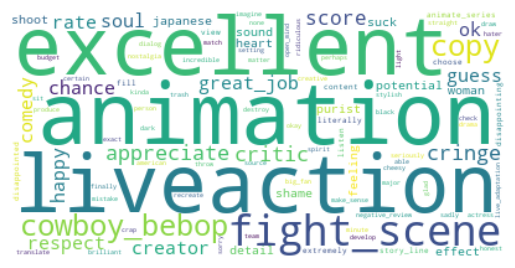

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



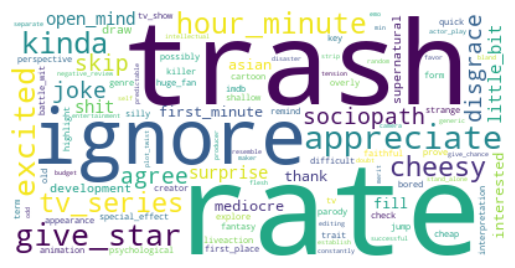

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



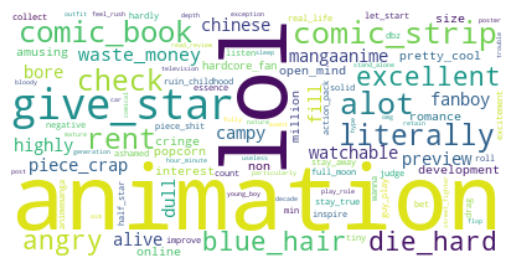

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



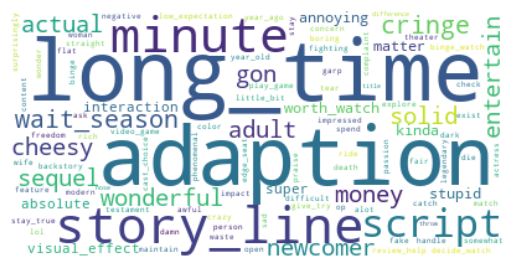

In [49]:
for i in range(len(critic_sites_tfidf)):
    path = 'term_frequency/critic/wordcloud/critic_sites_' + titles[i] + '_wordcloud.png'
    create_wordcloud(critic_sites_tfidf[i], path)